<a href="https://colab.research.google.com/github/fakhar-nadeem/Data-Science/blob/main/Assessment_DAS7005%20v1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing libraries and mounting drive:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Mounting the google drive to the colab environment:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/Assessment Data-20250304/'

/content/drive/MyDrive/Assessment Data-20250304


In [4]:
%ls

Assessment_combined.csv
combined_output.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv
Transformed_dataset.csv


### **Loading the Pandas dataframe:**

In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
urban_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
suburban_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
rural_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
industrial_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")


# **Data Cleaning**

## Cleaning Urban Dataset:



### **Checking Null Values:**

In [6]:
urban_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Handling Null values:**

In [7]:
# Remove columns with too many missing values
urban_df.dropna(axis=1, thresh=0.9*len(urban_df), inplace=True)  # Keep columns with at least 90% non-null values
# Remove rows with missing values
urban_df.dropna(inplace=True)
urban_df.isnull().sum() # To check if there are any missing values left

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in a time series dataset.

In [8]:
#Filling rows with missing values
urban_df.fillna(method='ffill', inplace=True)
urban_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [9]:
urban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
5          6  2013      3    1     5    4.0   4.0   9.0  25.0   300.0  78.0   
6          7  2013      3    1     6    5.0   5.0  10.0  29.0   400.0  67.0   
7          8  2013      3    1     7    3.0   6.0  12.0  40.0   400.0  52.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
5      -2.4  1027.5 -21.3   0.0   NW   2.4  Dongsi  
6      -2.5  1028.2 -20.4   0.0   NW   2.2  Dongsi  
7      -1.4  1029.5 -20.4   0.0  NNW   3.0  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[30338 rows x 18 columns]

### **Removing Duplicates:**

In [10]:
urban_df.drop_duplicates(inplace=True)

In [11]:
urban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
5          6  2013      3    1     5    4.0   4.0   9.0  25.0   300.0  78.0   
6          7  2013      3    1     6    5.0   5.0  10.0  29.0   400.0  67.0   
7          8  2013      3    1     7    3.0   6.0  12.0  40.0   400.0  52.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
5      -2.4  1027.5 -21.3   0.0   NW   2.4  Dongsi  
6      -2.5  1028.2 -20.4   0.0   NW   2.2  Dongsi  
7      -1.4  1029.5 -20.4   0.0  NNW   3.0  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[30338 rows x 18 columns]

### **Handling Outliers:**

Using Z-score

####Temperature:

In [12]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['TEMP'])) < 3)]

####PM2.5:

In [13]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['PM2.5'])) < 3)]

####PM10:

In [14]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['PM10'])) < 3)]

####SO2:

In [15]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['SO2'])) < 3)]

####NO2:

In [16]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['NO2'])) < 3)]

####CO:

In [17]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['CO'])) < 3)]

####O3:

In [18]:
from scipy import stats

# Remove outliers with Z-score > 3
urban_df = urban_df[(np.abs(stats.zscore(urban_df['O3'])) < 3)]

### **Scaling Data:**

Machine learning models (like Linear Regression, KNN, SVM, etc.) perform better and more accurately when all input features are on a similar scale. Im using Min-Max Scaling.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of features to scale
features_to_scale = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'PRES', 'WSPM']

# Apply scaler to each column individually
for col in features_to_scale:
    urban_df[[col]] = scaler.fit_transform(urban_df[[col]])

### **Correcting Data Types:**

In [20]:
print(urban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [21]:
#Creating a datetime column
urban_df['datetime'] = pd.to_datetime(urban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
urban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
urban_df = urban_df[new_order]
urban_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0     2013-03-01 00:00:00      1  0.017857  0.019444  0.027027  0.107143   
1     2013-03-01 01:00:00      2  0.002976  0.005556  0.027027  0.100000   
5     2013-03-01 05:00:00      6  0.002976  0.005556  0.108108  0.164286   
6     2013-03-01 06:00:00      7  0.005952  0.008333  0.121622  0.192857   
7     2013-03-01 07:00:00      8  0.000000  0.011111  0.148649  0.271429   
...                   ...    ...       ...       ...       ...       ...   
35059 2017-02-28 19:00:00  35060  0.038690  0.136111  0.027027  0.192857   
35060 2017-02-28 20:00:00  35061  0.044643  0.119444  0.027027  0.292857   
35061 2017-02-28 21:00:00  35062  0.059524  0.155556  0.054054  0.421429   
35062 2017-02-28 22:00:00  35063  0.059524  0.141667  0.108108  0.521429   
35063 2017-02-28 23:00:00  35064  0.080357  0.191667  0.135135  0.607143   

             CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0      0.054054  0.377682  0.284965  0.678899  0.216849   0.0  NNW  0.542857   
1      0.054054  0.373391  0.281469  0.689908  0.205928   0.0   NW  0.371429   
5      0.054054  0.330472  0.251748  0.733945  0.218409   0.0   NW  0.228571   
6      0.081081  0.283262  0.250000  0.746789  0.232449   0.0   NW  0.209524   
7      0.081081  0.218884  0.269231  0.770642  0.232449   0.0  NNW  0.285714   
...         ...       ...       ...       ...       ...   ...  ...       ...   
35059  0.081081  0.309013  0.512238  0.477064  0.297972   0.0   NW  0.228571   
35060  0.108108  0.227468  0.496503  0.478899  0.315133   0.0  WNW  0.085714   
35061  0.162162  0.115880  0.482517  0.489908  0.343214   0.0   NW  0.104762   
35062  0.216216  0.060086  0.477273  0.493578  0.349454   0.0  NNW  0.114286   
35063  0.297297  0.012876  0.444056  0.488073  0.302652   0.0  NNE  0.123810   

      station  
0      Dongsi  
1      Dongsi  
5      Dongsi  
6      Dongsi  
7      Dongsi  
...       ...  
35059  Dongsi  
35060  Dongsi  
35061  Dongsi  
35062  Dongsi  
35063  Dongsi  

[27925 rows x 15 columns]

## Cleaning Suburban Dataset:



### **Checking Null Values:**

In [22]:
suburban_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

**Handling Null values:**

In [23]:
# Remove columns with too many missing values
suburban_df.dropna(axis=1, thresh=0.9*len(suburban_df), inplace=True)  # Keep columns with at least 90% non-null values
# Remove rows with missing values
suburban_df.dropna(inplace=True)
suburban_df.isnull().sum() # To check if there are any missing values left

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in a time series dataset.

In [24]:
#Filling rows with missing values
suburban_df.fillna(method='ffill', inplace=True)
suburban_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [25]:
suburban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
5          6  2013      3    1     5   11.0  11.0   3.0   7.0   200.0  45.0   
6          7  2013      3    1     6   12.0  12.0   3.0   9.0   300.0  74.0   
7          8  2013      3    1     7   13.0  13.0   3.0  23.0   300.0  59.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
5      -2.8  1028.2 -22.1   0.0  NNW   1.7  Shunyi  
6      -4.0  1029.0 -21.2   0.0  NNE   1.6  Shunyi  
7      -2.4  1030.5 -21.3   0.0   NE   1.7  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[30194 rows x 18 columns]

###**Removing Duplicates:**

In [26]:
suburban_df.drop_duplicates(inplace=True)

In [27]:
suburban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
5          6  2013      3    1     5   11.0  11.0   3.0   7.0   200.0  45.0   
6          7  2013      3    1     6   12.0  12.0   3.0   9.0   300.0  74.0   
7          8  2013      3    1     7   13.0  13.0   3.0  23.0   300.0  59.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
5      -2.8  1028.2 -22.1   0.0  NNW   1.7  Shunyi  
6      -4.0  1029.0 -21.2   0.0  NNE   1.6  Shunyi  
7      -2.4  1030.5 -21.3   0.0   NE   1.7  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[30194 rows x 18 columns]

### **Handling Outliers:**

Using Z-score

####Temperature:

In [28]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['TEMP'])) < 3)]

####PM2.5:

In [29]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['PM2.5'])) < 3)]

####PM10:

In [30]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['PM10'])) < 3)]

####SO2:

In [31]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['SO2'])) < 3)]

####NO2:

In [32]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['NO2'])) < 3)]

####CO:

In [33]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['CO'])) < 3)]

####O3:

In [34]:
from scipy import stats

# Remove outliers with Z-score > 3
suburban_df = suburban_df[(np.abs(stats.zscore(suburban_df['O3'])) < 3)]

### **Scaling Data:**

Machine learning models (like Linear Regression, KNN, SVM, etc.) perform better and more accurately when all input features are on a similar scale. Im using Min-Max Scaling.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of features to scale
features_to_scale = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'PRES', 'WSPM']

# Apply scaler to each column individually
for col in features_to_scale:
    suburban_df[[col]] = scaler.fit_transform(suburban_df[[col]])

### **Correcting Data Types:**

In [36]:
print(suburban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [37]:
#Creating a datetime column
suburban_df['datetime'] = pd.to_datetime(suburban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
suburban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
suburban_df = suburban_df[new_order]
suburban_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0     2013-03-01 00:00:00      1  0.003135  0.012158  0.028571  0.048387   
1     2013-03-01 01:00:00      2  0.031348  0.030395  0.028571  0.040323   
5     2013-03-01 05:00:00      6  0.028213  0.027356  0.028571  0.040323   
6     2013-03-01 06:00:00      7  0.031348  0.030395  0.028571  0.056452   
7     2013-03-01 07:00:00      8  0.034483  0.033435  0.028571  0.169355   
...                   ...    ...       ...       ...       ...       ...   
35059 2017-02-28 19:00:00  35060  0.078370  0.212766  0.100000  0.725806   
35060 2017-02-28 20:00:00  35061  0.141066  0.161094  0.228571  0.677419   
35061 2017-02-28 21:00:00  35062  0.050157  0.079027  0.042857  0.225806   
35062 2017-02-28 22:00:00  35063  0.050157  0.054711  0.114286  0.250000   
35063 2017-02-28 23:00:00  35064  0.040752  0.060790  0.171429  0.258065   

             CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0      0.055556  0.198318  0.288566  0.689781  0.244094   0.0   NW  0.845455   
1      0.055556  0.211906  0.284936  0.695255  0.231496   0.0   NW  0.854545   
5      0.027778  0.202847  0.254083  0.733577  0.218898   0.0  NNW  0.154545   
6      0.055556  0.334196  0.232305  0.748175  0.233071   0.0  NNE  0.145455   
7      0.055556  0.266257  0.261343  0.775547  0.231496   0.0   NE  0.154545   
...         ...       ...       ...       ...       ...   ...  ...       ...   
35059  0.194444  0.071498  0.491833  0.478102  0.371654   0.0    W  0.163636   
35060  0.277778  0.085086  0.482759  0.483577  0.411024   0.0   NW  0.136364   
35061  0.111111  0.288904  0.470054  0.485401  0.366929   0.0   NE  0.154545   
35062  0.111111  0.266257  0.433757  0.496350  0.359055   0.0  WNW  0.163636   
35063  0.111111  0.270786  0.439201  0.490876  0.379528   0.0    N  0.127273   

      station  
0      Shunyi  
1      Shunyi  
5      Shunyi  
6      Shunyi  
7      Shunyi  
...       ...  
35059  Shunyi  
35060  Shunyi  
35061  Shunyi  
35062  Shunyi  
35063  Shunyi  

[27437 rows x 15 columns]

## Cleaning Rural Dataset:



### **Checking Null Values:**

In [38]:
rural_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

**Handling Null values:**

In [39]:
# Remove columns with too many missing values
rural_df.dropna(axis=1, thresh=0.9*len(rural_df), inplace=True)  # Keep columns with at least 90% non-null values
# Remove rows with missing values
rural_df.dropna(inplace=True)
rural_df.isnull().sum() # To check if there are any missing values left

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in a time series dataset.

In [40]:
#Filling rows with missing values
rural_df.fillna(method='ffill', inplace=True)
rural_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [41]:
rural_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0   3.0   2.0   100.0  91.0   
5          6  2013      3    1     5    4.0   4.0   3.0   3.0   200.0  85.0   
6          7  2013      3    1     6    3.0   6.0  33.0   7.0   300.0  82.0   
7          8  2013      3    1     7    3.0  10.0  13.0  13.0   400.0  71.0   
8          9  2013      3    1     8    3.0  13.0  34.0  38.0   800.0  45.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0   2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0   4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0   2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0   3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0   2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
5      -4.2  1022.3 -24.5   0.0    N   4.3  Huairou  
6      -5.9  1023.1 -21.9   0.0  WNW   0.6  Huairou  
7      -2.7  1024.3 -23.2   0.0  NNE   3.4  Huairou  
8      -1.6  1025.2 -23.5   0.0  NNE   4.6  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
35059   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[31708 rows x 18 columns]

### **Removing Duplicates:**

In [42]:
rural_df.drop_duplicates(inplace=True)

In [43]:
suburban_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0     2013-03-01 00:00:00      1  0.003135  0.012158  0.028571  0.048387   
1     2013-03-01 01:00:00      2  0.031348  0.030395  0.028571  0.040323   
5     2013-03-01 05:00:00      6  0.028213  0.027356  0.028571  0.040323   
6     2013-03-01 06:00:00      7  0.031348  0.030395  0.028571  0.056452   
7     2013-03-01 07:00:00      8  0.034483  0.033435  0.028571  0.169355   
...                   ...    ...       ...       ...       ...       ...   
35059 2017-02-28 19:00:00  35060  0.078370  0.212766  0.100000  0.725806   
35060 2017-02-28 20:00:00  35061  0.141066  0.161094  0.228571  0.677419   
35061 2017-02-28 21:00:00  35062  0.050157  0.079027  0.042857  0.225806   
35062 2017-02-28 22:00:00  35063  0.050157  0.054711  0.114286  0.250000   
35063 2017-02-28 23:00:00  35064  0.040752  0.060790  0.171429  0.258065   

             CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0      0.055556  0.198318  0.288566  0.689781  0.244094   0.0   NW  0.845455   
1      0.055556  0.211906  0.284936  0.695255  0.231496   0.0   NW  0.854545   
5      0.027778  0.202847  0.254083  0.733577  0.218898   0.0  NNW  0.154545   
6      0.055556  0.334196  0.232305  0.748175  0.233071   0.0  NNE  0.145455   
7      0.055556  0.266257  0.261343  0.775547  0.231496   0.0   NE  0.154545   
...         ...       ...       ...       ...       ...   ...  ...       ...   
35059  0.194444  0.071498  0.491833  0.478102  0.371654   0.0    W  0.163636   
35060  0.277778  0.085086  0.482759  0.483577  0.411024   0.0   NW  0.136364   
35061  0.111111  0.288904  0.470054  0.485401  0.366929   0.0   NE  0.154545   
35062  0.111111  0.266257  0.433757  0.496350  0.359055   0.0  WNW  0.163636   
35063  0.111111  0.270786  0.439201  0.490876  0.379528   0.0    N  0.127273   

      station  
0      Shunyi  
1      Shunyi  
5      Shunyi  
6      Shunyi  
7      Shunyi  
...       ...  
35059  Shunyi  
35060  Shunyi  
35061  Shunyi  
35062  Shunyi  
35063  Shunyi  

[27437 rows x 15 columns]

### **Handling Outliers:**

Using Z-score

####Temperature:

In [44]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['TEMP'])) < 3)]

####PM2.5:

In [45]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['PM2.5'])) < 3)]

####PM10:

In [46]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['PM10'])) < 3)]

####SO2:

In [47]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['SO2'])) < 3)]

####NO2:

In [48]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['NO2'])) < 3)]

####CO:

In [49]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['CO'])) < 3)]

####O3:

In [50]:
from scipy import stats

# Remove outliers with Z-score > 3
rural_df = rural_df[(np.abs(stats.zscore(rural_df['O3'])) < 3)]

### **Scaling Data:**

Machine learning models (like Linear Regression, KNN, SVM, etc.) perform better and more accurately when all input features are on a similar scale. Im using Min-Max Scaling.

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of features to scale
features_to_scale = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'PRES', 'WSPM']

# Apply scaler to each column individually
for col in features_to_scale:
    rural_df[[col]] = scaler.fit_transform(rural_df[[col]])

### **Correcting Data Types:**

In [52]:
print(rural_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [53]:
#Creating a datetime column
rural_df['datetime'] = pd.to_datetime(rural_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
rural_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
rural_df = rural_df[new_order]
rural_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0     2013-03-01 00:00:00      1  0.017794  0.013072  0.031250  0.000000   
5     2013-03-01 05:00:00      6  0.007117  0.003268  0.031250  0.010309   
6     2013-03-01 06:00:00      7  0.003559  0.009804  0.500000  0.051546   
7     2013-03-01 07:00:00      8  0.003559  0.022876  0.187500  0.113402   
8     2013-03-01 08:00:00      9  0.003559  0.032680  0.515625  0.371134   
...                   ...    ...       ...       ...       ...       ...   
35059 2017-02-28 19:00:00  35060  0.049822  0.081699  0.015625  0.175258   
35060 2017-02-28 20:00:00  35061  0.067616  0.101307  0.046875  0.226804   
35061 2017-02-28 21:00:00  35062  0.053381  0.098039  0.015625  0.381443   
35062 2017-02-28 22:00:00  35063  0.032028  0.084967  0.031250  0.309278   
35063 2017-02-28 23:00:00  35064  0.032028  0.055556  0.015625  0.257732   

             CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0      0.000000  0.400315  0.292359  0.698324  0.221875   0.0  WNW  0.240310   
5      0.035714  0.373859  0.260797  0.735568  0.162500   0.0    N  0.333333   
6      0.071429  0.360630  0.232558  0.750466  0.203125   0.0  WNW  0.046512   
7      0.107143  0.312126  0.285714  0.772812  0.182812   0.0  NNE  0.263566   
8      0.250000  0.197481  0.303987  0.789572  0.178125   0.0  NNE  0.356589   
...         ...       ...       ...       ...       ...   ...  ...       ...   
35059  0.071429  0.417953  0.495017  0.480447  0.325000   0.0  WNW  0.139535   
35060  0.142857  0.351811  0.488372  0.486034  0.320312   0.0  SSW  0.100775   
35061  0.285714  0.263622  0.470100  0.493482  0.317187   0.0   SE  0.116279   
35062  0.464286  0.303307  0.468439  0.497207  0.315625   0.0  ENE  0.248062   
35063  0.107143  0.338583  0.441860  0.493482  0.332812   0.0   NE  0.147287   

       station  
0      Huairou  
5      Huairou  
6      Huairou  
7      Huairou  
8      Huairou  
...        ...  
35059  Huairou  
35060  Huairou  
35061  Huairou  
35062  Huairou  
35063  Huairou  

[28730 rows x 15 columns]

## Cleaning Industrial Dataset:



### **Checking Null Values:**

In [54]:
industrial_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Handling Null values:**

In [55]:
# Remove columns with too many missing values
industrial_df.dropna(axis=1, thresh=0.9*len(industrial_df), inplace=True)  # Keep columns with at least 90% non-null values
# Remove rows with missing values
industrial_df.dropna(inplace=True)
industrial_df.isnull().sum() # To check if there are any missing values left

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in a time series dataset.

In [56]:
#Filling rows with missing values
industrial_df.fillna(method='ffill', inplace=True)
industrial_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [57]:
industrial_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[32263 rows x 18 columns]

### **Removing Duplicates:**

In [58]:
industrial_df.drop_duplicates(inplace=True)

In [59]:
industrial_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[32263 rows x 18 columns]

### **Handling Outliers:**

Using Z-score

####Temperature:

In [60]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['TEMP'])) < 3)]

####PM2.5:

In [61]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['PM2.5'])) < 3)]

####PM10:

In [62]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['PM10'])) < 3)]

####SO2:

In [63]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['SO2'])) < 3)]

####NO2:

In [64]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['NO2'])) < 3)]

####CO:

In [65]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['CO'])) < 3)]

####O3:

In [66]:
from scipy import stats

# Remove outliers with Z-score > 3
industrial_df = industrial_df[(np.abs(stats.zscore(industrial_df['O3'])) < 3)]

### **Scaling Data:**

Machine learning models (like Linear Regression, KNN, SVM, etc.) perform better and more accurately when all input features are on a similar scale. Im using Min-Max Scaling.

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of features to scale
features_to_scale = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'PRES', 'WSPM']

# Apply scaler to each column individually
for col in features_to_scale:
    industrial_df[[col]] = scaler.fit_transform(industrial_df[[col]])

### **Correcting Data Types:**

In [68]:
print(industrial_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [69]:
#Creating a datetime column
industrial_df['datetime'] = pd.to_datetime(industrial_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
industrial_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
industrial_df = industrial_df[new_order]
industrial_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0     2013-03-01 00:00:00      1  0.003086  0.005865  0.158537  0.122449   
1     2013-03-01 01:00:00      2  0.003086  0.005865  0.146341  0.102041   
2     2013-03-01 02:00:00      3  0.000000  0.002933  0.109756  0.115646   
3     2013-03-01 03:00:00      4  0.000000  0.011730  0.073171  0.149660   
4     2013-03-01 04:00:00      5  0.000000  0.011730  0.048780  0.081633   
...                   ...    ...       ...       ...       ...       ...   
35059 2017-02-28 19:00:00  35060  0.030864  0.102639  0.024390  0.231293   
35060 2017-02-28 20:00:00  35061  0.052469  0.120235  0.036585  0.312925   
35061 2017-02-28 21:00:00  35062  0.040123  0.090909  0.048780  0.251701   
35062 2017-02-28 22:00:00  35063  0.024691  0.064516  0.048780  0.306122   
35063 2017-02-28 23:00:00  35064  0.037037  0.073314  0.048780  0.346939   

             CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0      0.055556  0.295490  0.280977  0.661319  0.258621   0.0  NNW  0.392857   
1      0.055556  0.308377  0.273997  0.664884  0.268025   0.0    N  0.419643   
2      0.055556  0.295490  0.273997  0.670232  0.268025   0.0  NNW  0.500000   
3      0.083333  0.265419  0.268761  0.688057  0.249216   0.0   NW  0.276786   
4      0.083333  0.304081  0.258290  0.700535  0.247649   0.0    N  0.178571   
...         ...       ...       ...       ...       ...   ...  ...       ...   
35059  0.083333  0.256828  0.511344  0.491979  0.299373   0.0   NW  0.214286   
35060  0.111111  0.183799  0.495637  0.493761  0.316614   0.0  WNW  0.080357   
35061  0.111111  0.213870  0.481675  0.504456  0.344828   0.0   NW  0.098214   
35062  0.111111  0.175207  0.476440  0.508021  0.351097   0.0  NNW  0.107143   
35063  0.138889  0.140841  0.443281  0.502674  0.304075   0.0  NNE  0.116071   

        station  
0      Guanyuan  
1      Guanyuan  
2      Guanyuan  
3      Guanyuan  
4      Guanyuan  
...         ...  
35059  Guanyuan  
35060  Guanyuan  
35061  Guanyuan  
35062  Guanyuan  
35063  Guanyuan  

[29475 rows x 15 columns]

## Merging all Datasets:

In [70]:
merged_df = pd.concat([urban_df, suburban_df, rural_df, industrial_df], ignore_index=True)
merged_df.to_csv("Assessment_combined.csv", index=False)
merged_df

datetime     No     PM2.5      PM10       SO2       NO2  \
0      2013-03-01 00:00:00      1  0.017857  0.019444  0.027027  0.107143   
1      2013-03-01 01:00:00      2  0.002976  0.005556  0.027027  0.100000   
2      2013-03-01 05:00:00      6  0.002976  0.005556  0.108108  0.164286   
3      2013-03-01 06:00:00      7  0.005952  0.008333  0.121622  0.192857   
4      2013-03-01 07:00:00      8  0.000000  0.011111  0.148649  0.271429   
...                    ...    ...       ...       ...       ...       ...   
113562 2017-02-28 19:00:00  35060  0.030864  0.102639  0.024390  0.231293   
113563 2017-02-28 20:00:00  35061  0.052469  0.120235  0.036585  0.312925   
113564 2017-02-28 21:00:00  35062  0.040123  0.090909  0.048780  0.251701   
113565 2017-02-28 22:00:00  35063  0.024691  0.064516  0.048780  0.306122   
113566 2017-02-28 23:00:00  35064  0.037037  0.073314  0.048780  0.346939   

              CO        O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  \
0       0.054054  0.377682  0.284965  0.678899  0.216849   0.0  NNW  0.542857   
1       0.054054  0.373391  0.281469  0.689908  0.205928   0.0   NW  0.371429   
2       0.054054  0.330472  0.251748  0.733945  0.218409   0.0   NW  0.228571   
3       0.081081  0.283262  0.250000  0.746789  0.232449   0.0   NW  0.209524   
4       0.081081  0.218884  0.269231  0.770642  0.232449   0.0  NNW  0.285714   
...          ...       ...       ...       ...       ...   ...  ...       ...   
113562  0.083333  0.256828  0.511344  0.491979  0.299373   0.0   NW  0.214286   
113563  0.111111  0.183799  0.495637  0.493761  0.316614   0.0  WNW  0.080357   
113564  0.111111  0.213870  0.481675  0.504456  0.344828   0.0   NW  0.098214   
113565  0.111111  0.175207  0.476440  0.508021  0.351097   0.0  NNW  0.107143   
113566  0.138889  0.140841  0.443281  0.502674  0.304075   0.0  NNE  0.116071   

         station  
0         Dongsi  
1         Dongsi  
2         Dongsi  
3         Dongsi  
4         Dongsi  
...          ...  
113562  Guanyuan  
113563  Guanyuan  
113564  Guanyuan  
113565  Guanyuan  
113566  Guanyuan  

[113567 rows x 15 columns]

# **Exploratory Data Analysis**

## Shape & Size:

In [71]:
#Find out how big the dataset is.
merged_df.shape

(113567, 15)

In [72]:
#shows columns in list format
merged_df.columns

Index(['datetime', 'No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

## Preview the Data

In [73]:
#First 5 rows
print(merged_df.head())
#Last 5 rows
print(merged_df.tail())

             datetime  No     PM2.5      PM10       SO2       NO2        CO  \
0 2013-03-01 00:00:00   1  0.017857  0.019444  0.027027  0.107143  0.054054   
1 2013-03-01 01:00:00   2  0.002976  0.005556  0.027027  0.100000  0.054054   
2 2013-03-01 05:00:00   6  0.002976  0.005556  0.108108  0.164286  0.054054   
3 2013-03-01 06:00:00   7  0.005952  0.008333  0.121622  0.192857  0.081081   
4 2013-03-01 07:00:00   8  0.000000  0.011111  0.148649  0.271429  0.081081   

         O3      TEMP      PRES      DEWP  RAIN   wd      WSPM station  
0  0.377682  0.284965  0.678899  0.216849   0.0  NNW  0.542857  Dongsi  
1  0.373391  0.281469  0.689908  0.205928   0.0   NW  0.371429  Dongsi  
2  0.330472  0.251748  0.733945  0.218409   0.0   NW  0.228571  Dongsi  
3  0.283262  0.250000  0.746789  0.232449   0.0   NW  0.209524  Dongsi  
4  0.218884  0.269231  0.770642  0.232449   0.0  NNW  0.285714  Dongsi  
                  datetime     No     PM2.5      PM10       SO2       NO2  \
113562 201

In [74]:
#Checking the data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113567 entries, 0 to 113566
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  113567 non-null  datetime64[ns]
 1   No        113567 non-null  int64         
 2   PM2.5     113567 non-null  float64       
 3   PM10      113567 non-null  float64       
 4   SO2       113567 non-null  float64       
 5   NO2       113567 non-null  float64       
 6   CO        113567 non-null  float64       
 7   O3        113567 non-null  float64       
 8   TEMP      113567 non-null  float64       
 9   PRES      113567 non-null  float64       
 10  DEWP      113567 non-null  float64       
 11  RAIN      113567 non-null  float64       
 12  wd        113567 non-null  object        
 13  WSPM      113567 non-null  float64       
 14  station   113567 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 13.0+ MB


## Check null values in merged file:

In [75]:
#Checking if there are any null calues in the dataset
merged_df.isnull().sum()

datetime    0
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

## Detecting Duplicates:

In [76]:
# Check for duplicates
print(merged_df.duplicated().sum())

0


## Summary Statistics:

In [77]:
#Basic statistics
print(merged_df.describe())

                            datetime             No          PM2.5  \
count                         113567  113567.000000  113567.000000   
mean   2015-03-27 11:09:19.588612864   18156.155441       0.201784   
min              2013-03-01 00:00:00       1.000000       0.000000   
25%              2014-04-27 17:00:00   10146.000000       0.050157   
50%              2015-04-09 18:00:00   18475.000000       0.145833   
75%              2016-03-12 04:00:00   26573.000000       0.295374   
max              2017-02-28 23:00:00   35064.000000       1.000000   
std                              NaN    9860.911209       0.189716   

                PM10            SO2            NO2             CO  \
count  113567.000000  113567.000000  113567.000000  113567.000000   
mean        0.254445       0.151814       0.318048       0.263781   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.086111       0.015625       0.145161       0.108108   
50%         0.209726    

## Univariate Analysis:

Univariate analysis focuses on one variable at a time.

### PM2.5 Analysis:

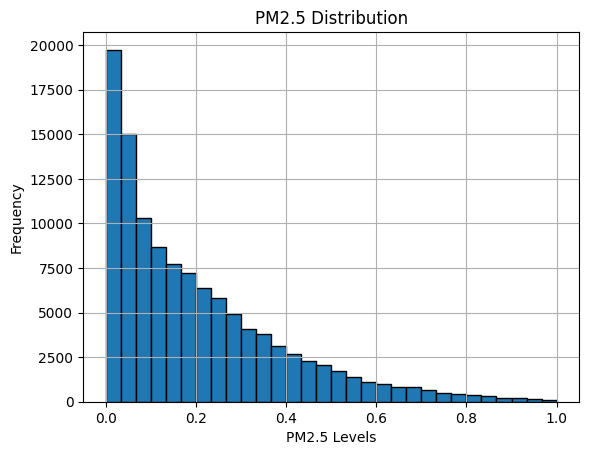

In [78]:
#Histogram shows the distribution of values.
merged_df['PM2.5'].hist(bins=30, edgecolor='black')
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5 Levels")
plt.ylabel("Frequency")
plt.show()

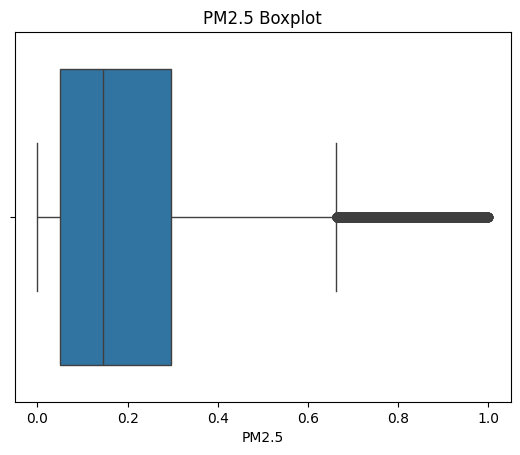

In [79]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM2.5'])
plt.title("PM2.5 Boxplot")
plt.show()

### PM10 Analysis:

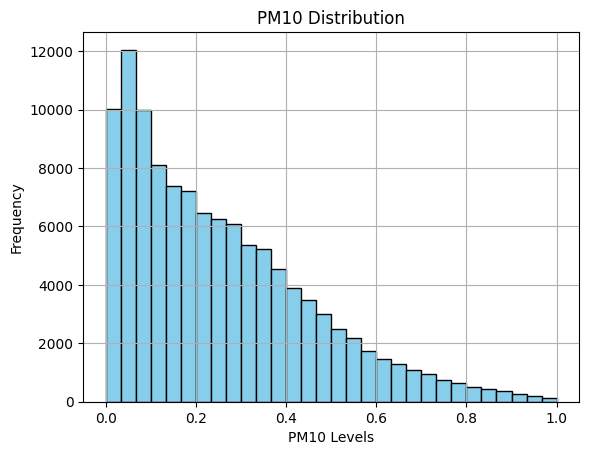

In [80]:
#Histogram shows the distribution of values.
merged_df['PM10'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PM10 Distribution")
plt.xlabel("PM10 Levels")
plt.ylabel("Frequency")
plt.show()

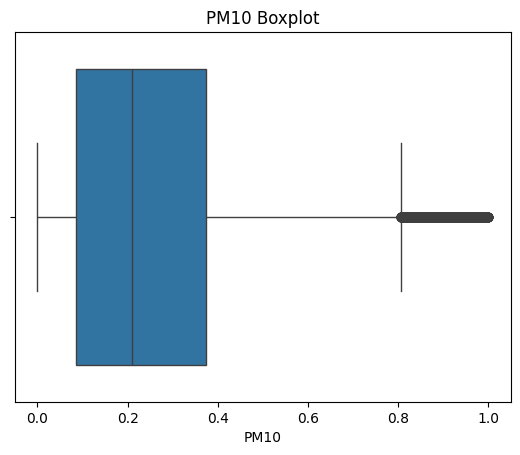

In [81]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM10'])
plt.title("PM10 Boxplot")
plt.show()

### SO2 Analysis:

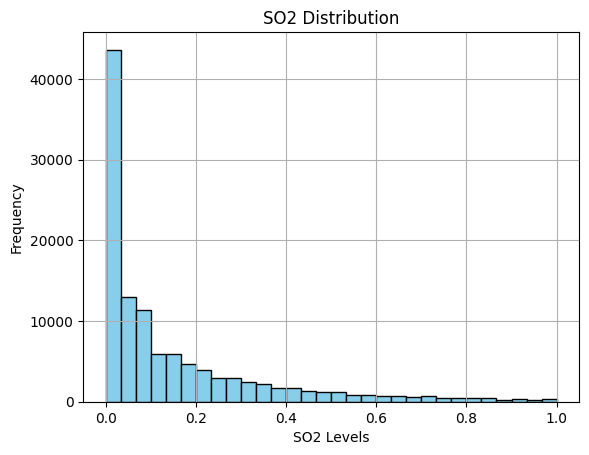

In [82]:
#Histogram shows the distribution of values.
merged_df['SO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("SO2 Distribution")
plt.xlabel("SO2 Levels")
plt.ylabel("Frequency")
plt.show()

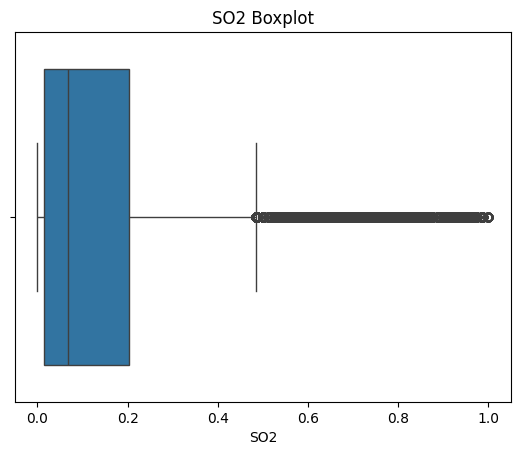

In [83]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['SO2'])
plt.title("SO2 Boxplot")
plt.show()

### NO2 Analysis:

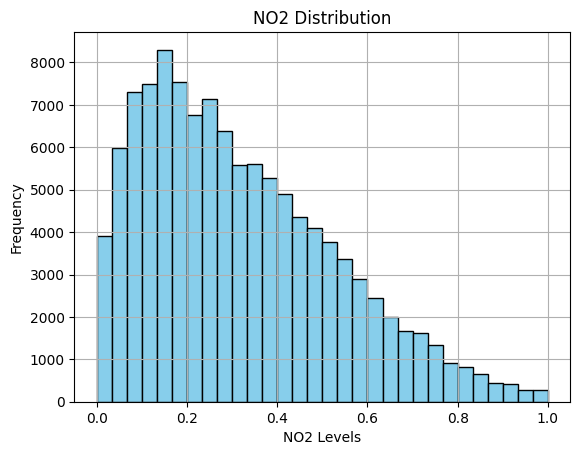

In [84]:
#Histogram shows the distribution of values.
merged_df['NO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("NO2 Distribution")
plt.xlabel("NO2 Levels")
plt.ylabel("Frequency")
plt.show()

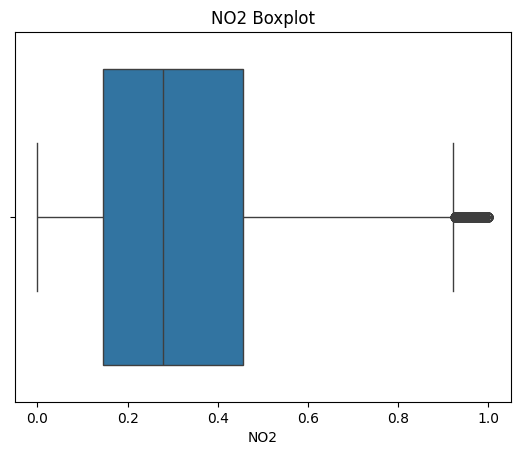

In [85]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['NO2'])
plt.title("NO2 Boxplot")
plt.show()

### CO Analysis:

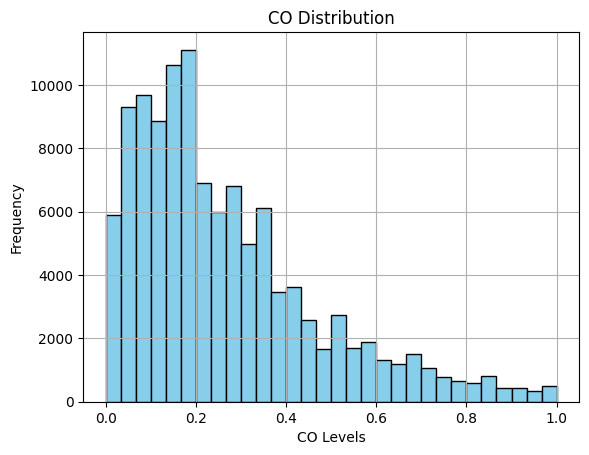

In [86]:
#Histogram shows the distribution of values.
merged_df['CO'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("CO Distribution")
plt.xlabel("CO Levels")
plt.ylabel("Frequency")
plt.show()

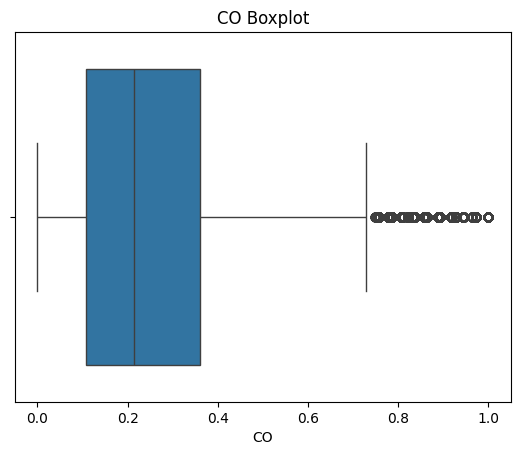

In [87]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['CO'])
plt.title("CO Boxplot")
plt.show()

### TEMP Analysis:

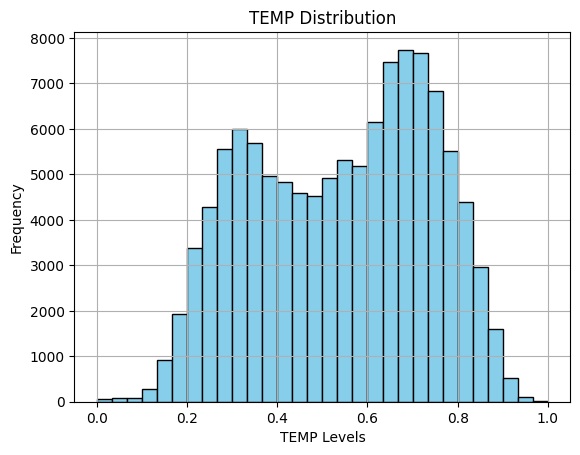

In [88]:
#Histogram shows the distribution of values.
merged_df['TEMP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("TEMP Distribution")
plt.xlabel("TEMP Levels")
plt.ylabel("Frequency")
plt.show()

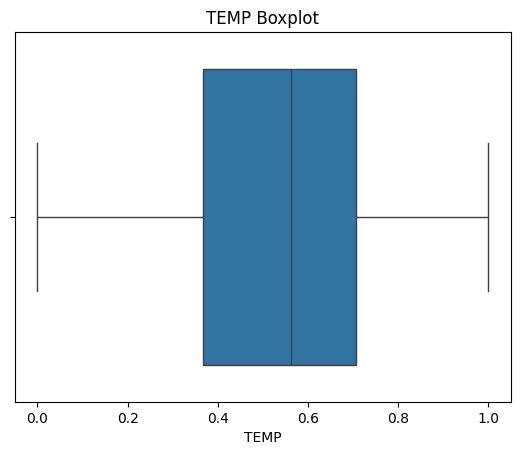

In [89]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['TEMP'])
plt.title("TEMP Boxplot")
plt.show()

### PRES Analysis:

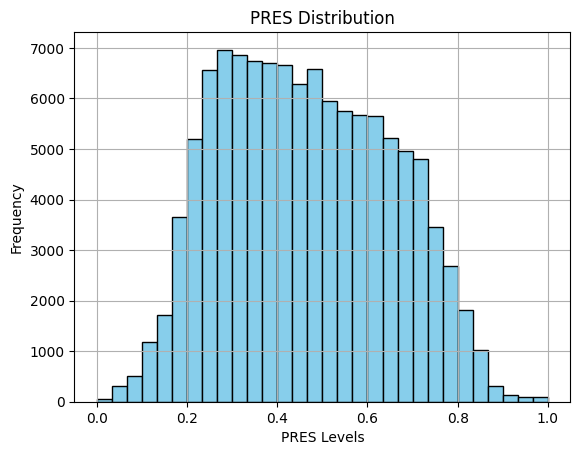

In [90]:
#Histogram shows the distribution of values.
merged_df['PRES'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PRES Distribution")
plt.xlabel("PRES Levels")
plt.ylabel("Frequency")
plt.show()

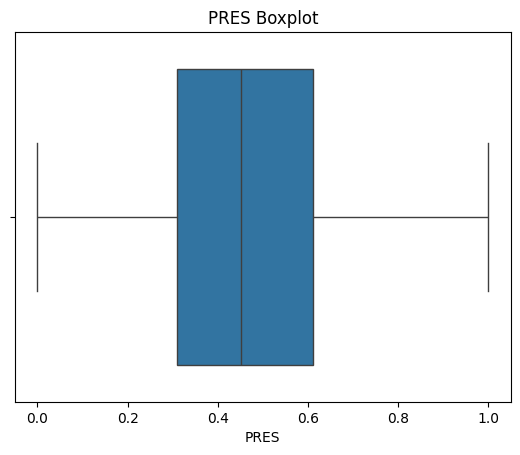

In [91]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PRES'])
plt.title("PRES Boxplot")
plt.show()

### DEWP Analysis:

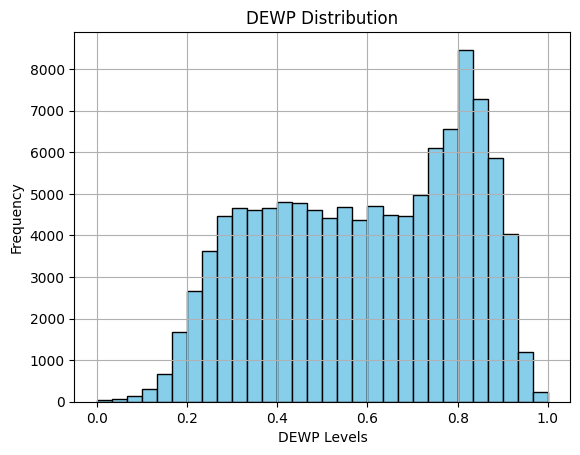

In [92]:
#Histogram shows the distribution of values.
merged_df['DEWP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("DEWP Distribution")
plt.xlabel("DEWP Levels")
plt.ylabel("Frequency")
plt.show()

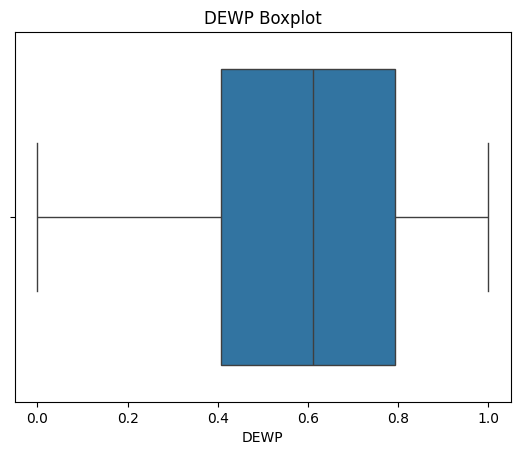

In [93]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['DEWP'])
plt.title("DEWP Boxplot")
plt.show()

### RAIN Analysis:

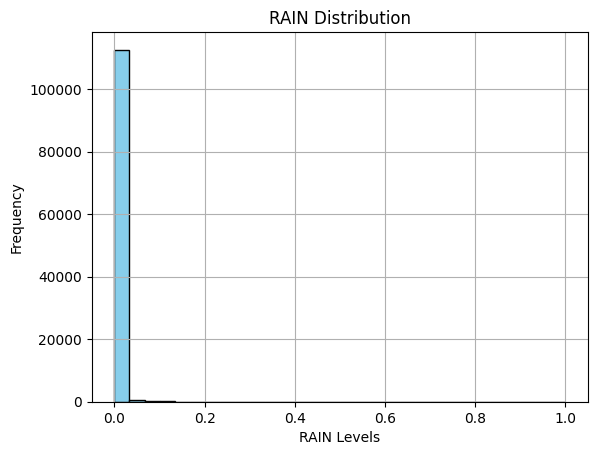

In [94]:
#Histogram shows the distribution of values.
merged_df['RAIN'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("RAIN Distribution")
plt.xlabel("RAIN Levels")
plt.ylabel("Frequency")
plt.show()

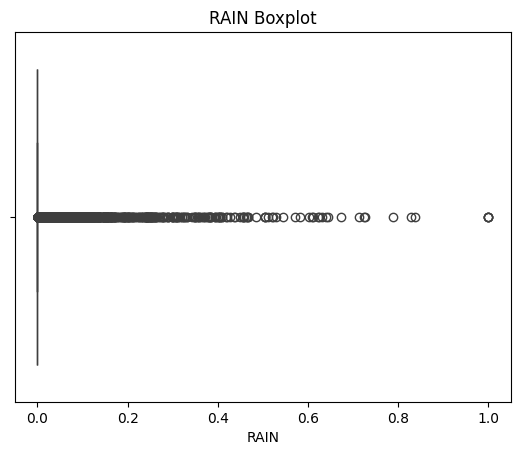

In [95]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['RAIN'])
plt.title("RAIN Boxplot")
plt.show()

### wd Analysis:

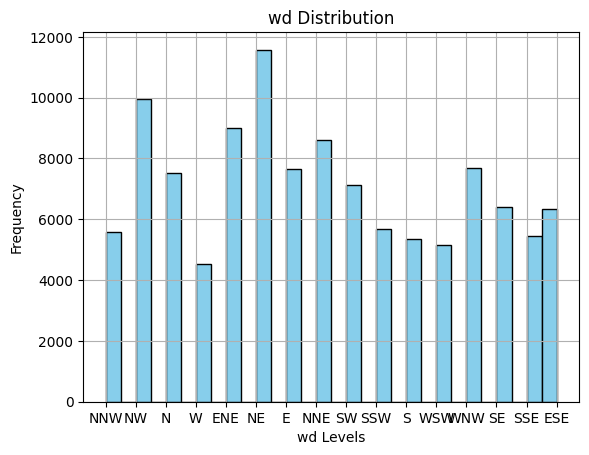

In [96]:
#Histogram shows the distribution of values.
merged_df['wd'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("wd Distribution")
plt.xlabel("wd Levels")
plt.ylabel("Frequency")
plt.show()

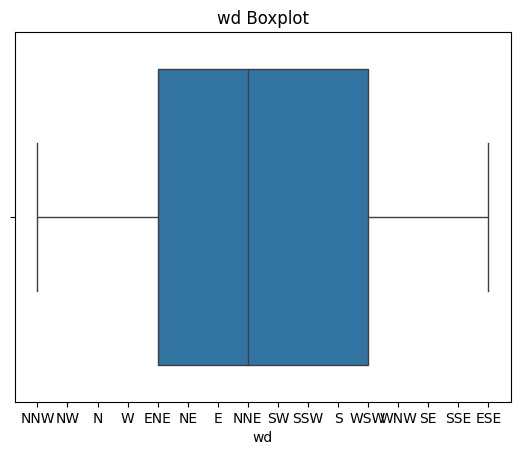

In [97]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['wd'])
plt.title("wd Boxplot")
plt.show()

### WSPM Analysis:

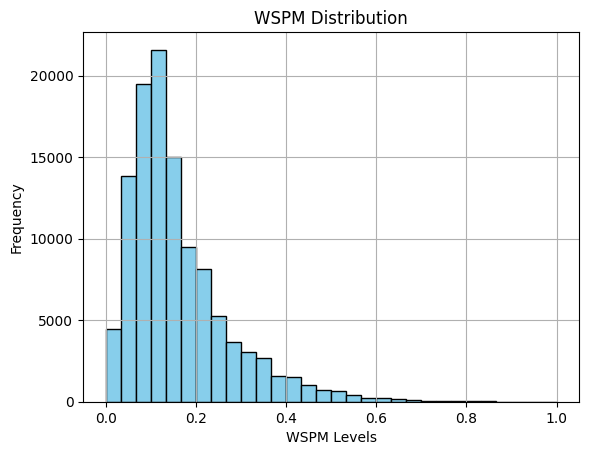

In [98]:
#Histogram shows the distribution of values.
merged_df['WSPM'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("WSPM Distribution")
plt.xlabel("WSPM Levels")
plt.ylabel("Frequency")
plt.show()

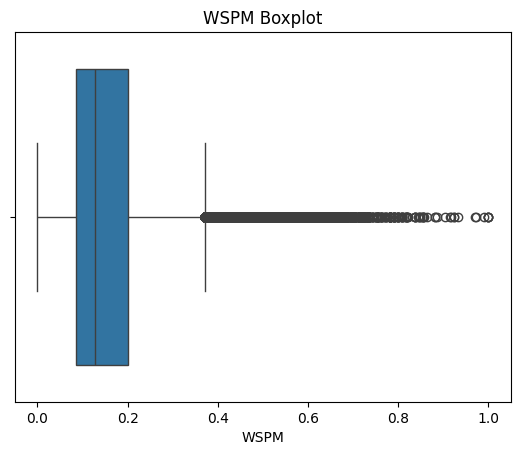

In [99]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['WSPM'])
plt.title("WSPM Boxplot")
plt.show()

### Distribution of Categorical Variables:

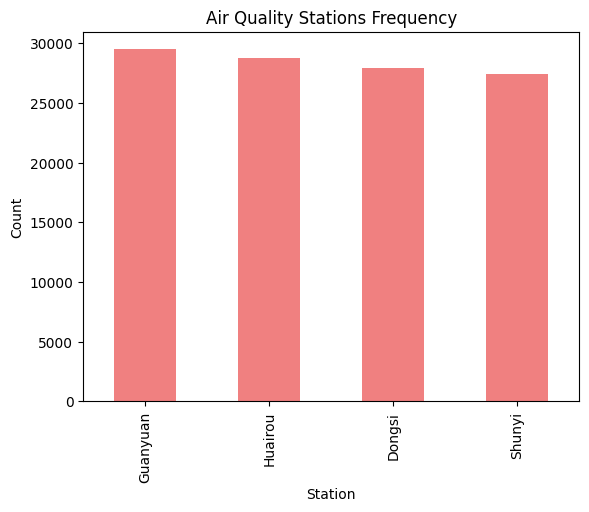

In [100]:
merged_df['station'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Air Quality Stations Frequency")
plt.xlabel("Station")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis:

Bivariate Analysis analyzes the relationship between two variables.

### Pollutants vs Conditions:

Checking to see how pollutants react in various conditions.

 #### PM2.5 vs various conditions:

##### PM2.5 vs Temperature

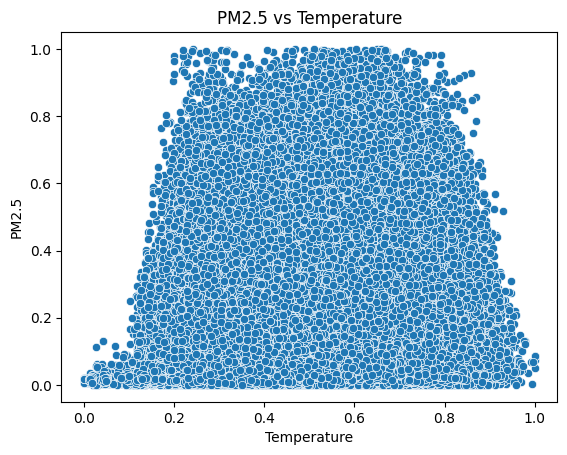

In [101]:
sns.scatterplot(x='TEMP', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Wind Speed:

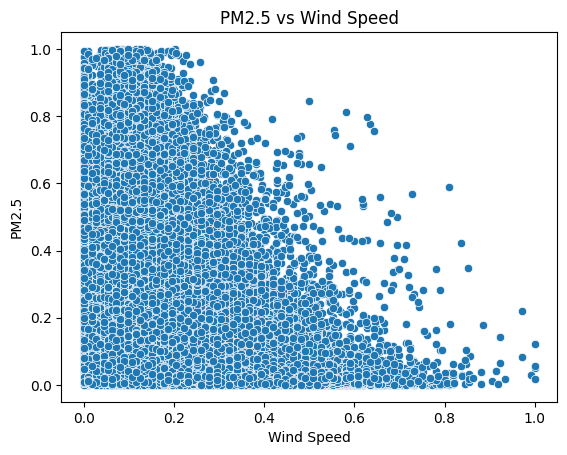

In [102]:
sns.scatterplot(x='WSPM', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Rainfall

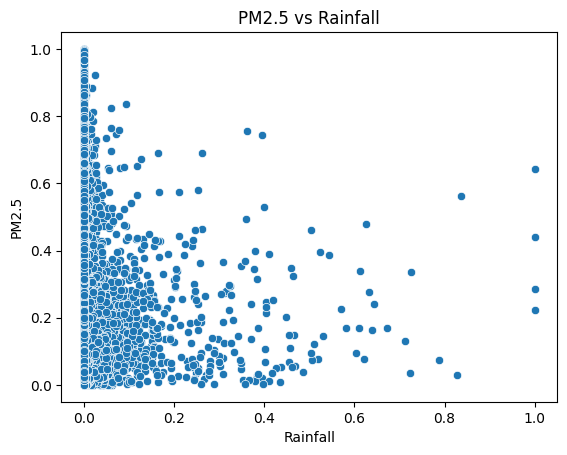

In [103]:
sns.scatterplot(x='RAIN', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Humidity/Dew Point

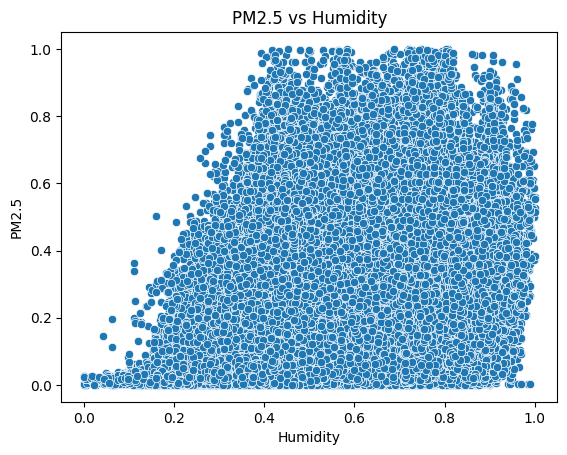

In [104]:
sns.scatterplot(x='DEWP', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("PM2.5")
plt.show()

 #### PM10 vs various conditions:

##### PM10 vs Temperature

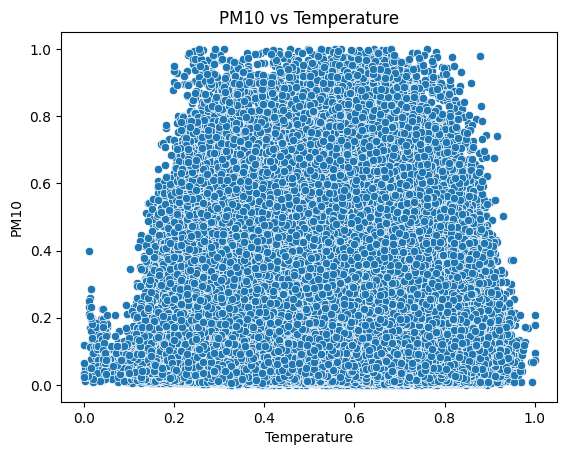

In [105]:
sns.scatterplot(x='TEMP', y='PM10', data=merged_df)
plt.title("PM10 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Wind Speed:

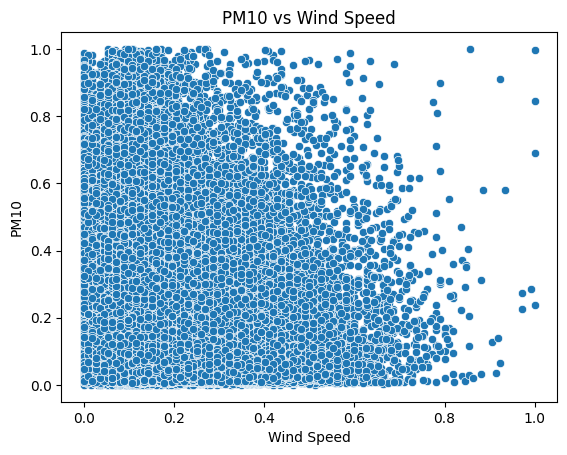

In [106]:
sns.scatterplot(x='WSPM', y='PM10', data=merged_df)
plt.title("PM10 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Rainfall

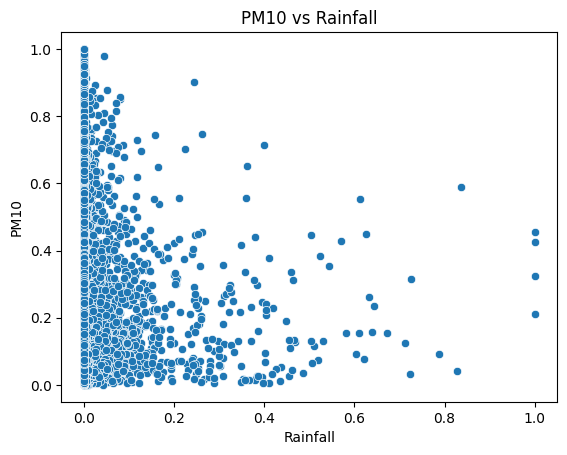

In [107]:
sns.scatterplot(x='RAIN', y='PM10', data=merged_df)
plt.title("PM10 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Humidity/Dew Point

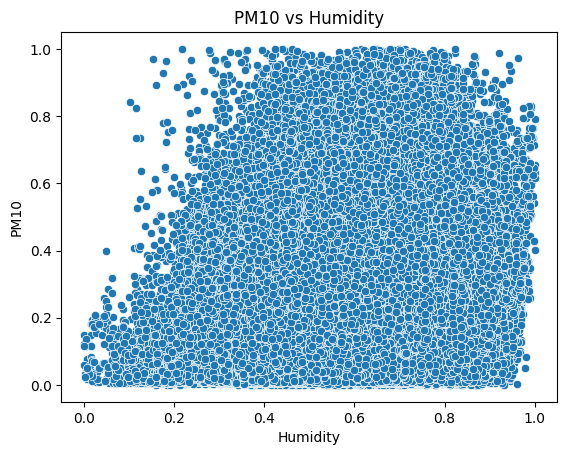

In [108]:
sns.scatterplot(x='DEWP', y='PM10', data=merged_df)
plt.title("PM10 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("PM10")
plt.show()

##### O3 vs Temperature

 #### SO2 vs various conditions:

##### SO2 vs Temperature

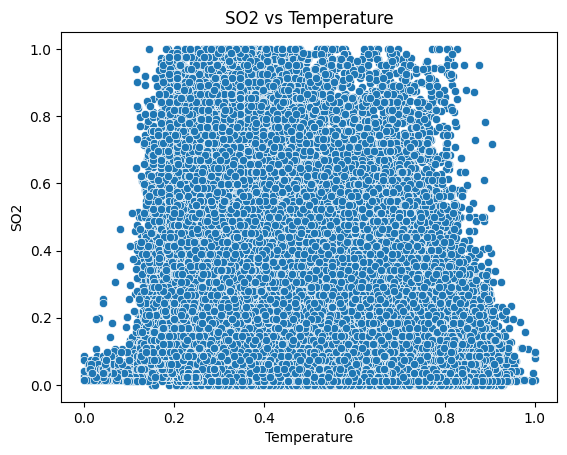

In [109]:
sns.scatterplot(x='TEMP', y='SO2', data=merged_df)
plt.title("SO2 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("SO2")
plt.show()

##### SO2 vs Wind Speed:

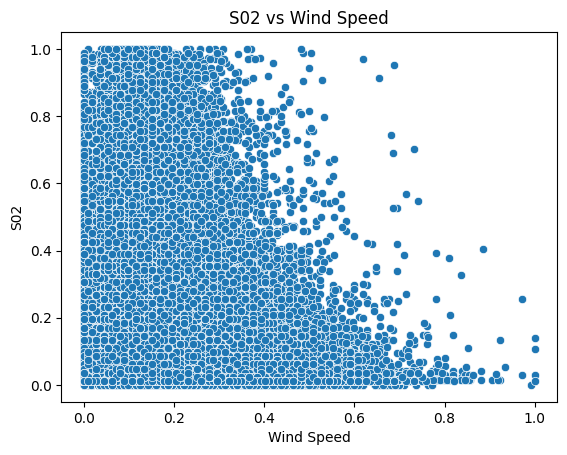

In [110]:
sns.scatterplot(x='WSPM', y='SO2', data=merged_df)
plt.title("S02 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("S02")
plt.show()

##### SO2 vs Rainfall

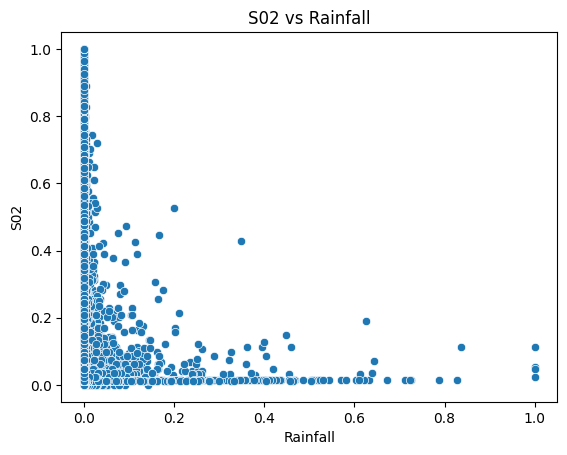

In [111]:
sns.scatterplot(x='RAIN', y='SO2', data=merged_df)
plt.title("S02 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("S02")
plt.show()

##### SO2 vs Humidity/Dew Point

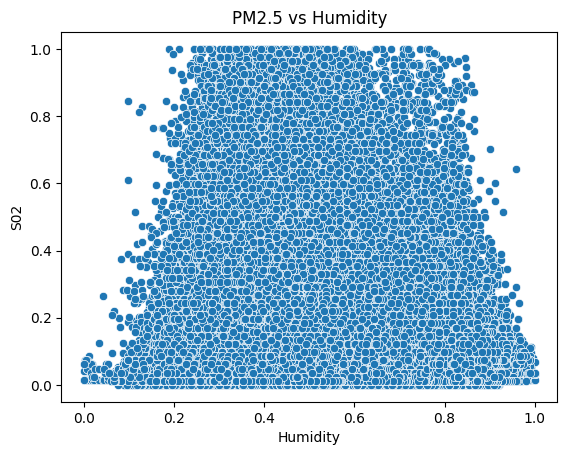

In [112]:
sns.scatterplot(x='DEWP', y='SO2', data=merged_df)
plt.title("PM2.5 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("S02")
plt.show()

 #### NO2 vs various conditions:

##### NO2 vs Temperature

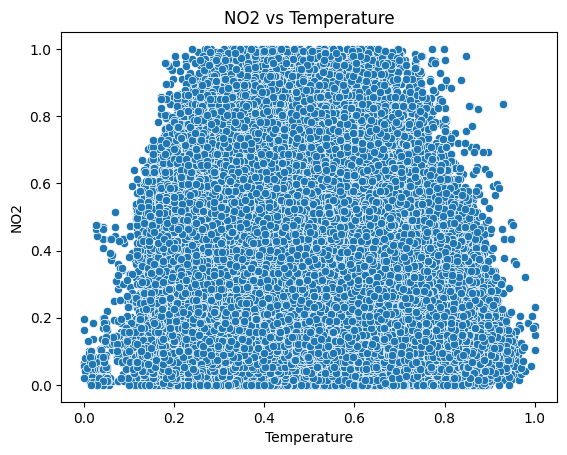

In [113]:
sns.scatterplot(x='TEMP', y='NO2', data=merged_df)
plt.title("NO2 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("NO2")
plt.show()

##### N02 vs Wind Speed:

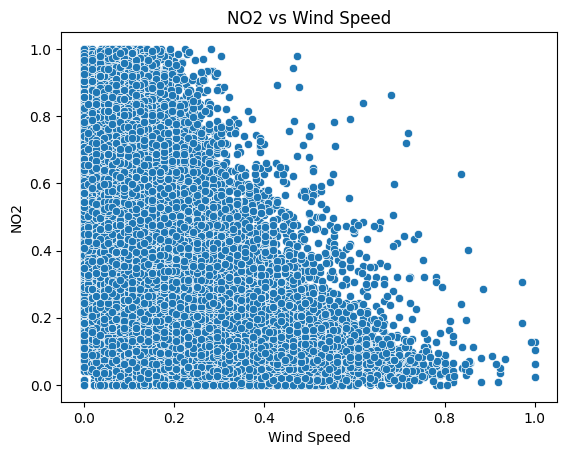

In [114]:
sns.scatterplot(x='WSPM', y='NO2', data=merged_df)
plt.title("NO2 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("NO2")
plt.show()

##### N02 vs Rainfall

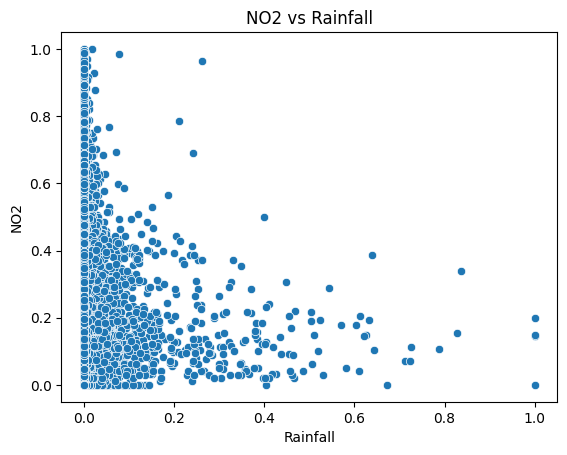

In [115]:
sns.scatterplot(x='RAIN', y='NO2', data=merged_df)
plt.title("NO2 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("NO2")
plt.show()

##### N02 vs Humidity/Dew Point

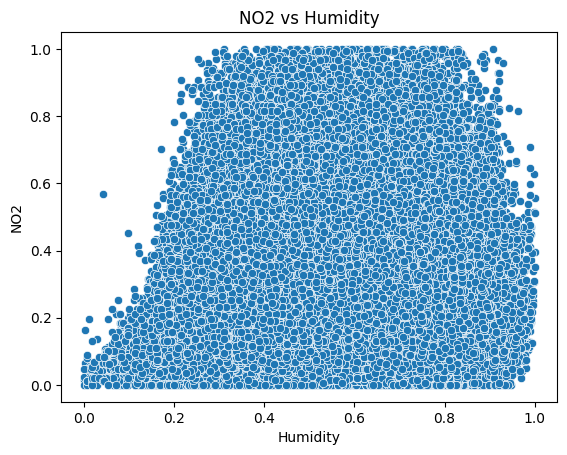

In [116]:
sns.scatterplot(x='DEWP', y='NO2', data=merged_df)
plt.title("NO2 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("NO2")
plt.show()

 #### CO vs various conditions:

##### CO vs Temperature

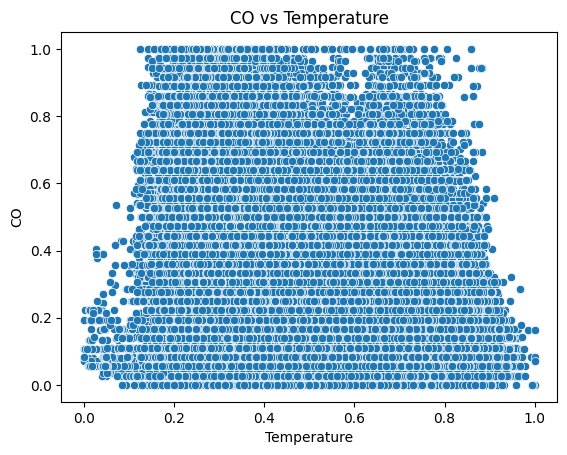

In [117]:
sns.scatterplot(x='TEMP', y='CO', data=merged_df)
plt.title("CO vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("CO")
plt.show()

##### CO vs Wind Speed:

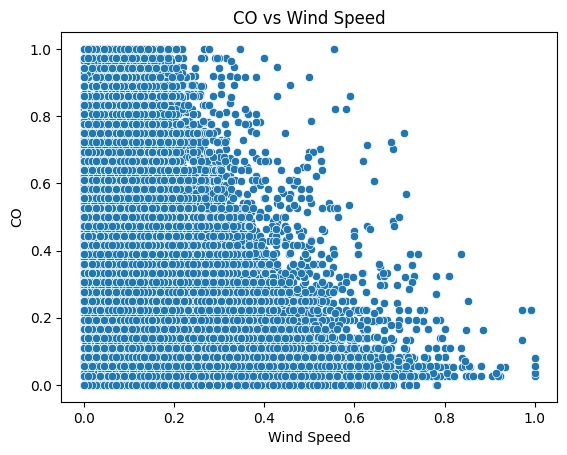

In [118]:
sns.scatterplot(x='WSPM', y='CO', data=merged_df)
plt.title("CO vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("CO")
plt.show()

##### CO vs Rainfall

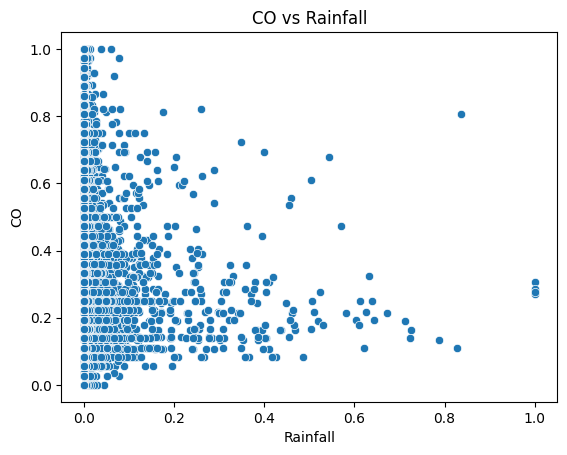

In [119]:
sns.scatterplot(x='RAIN', y='CO', data=merged_df)
plt.title("CO vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("CO")
plt.show()

##### CO vs Humidity/Dew Point

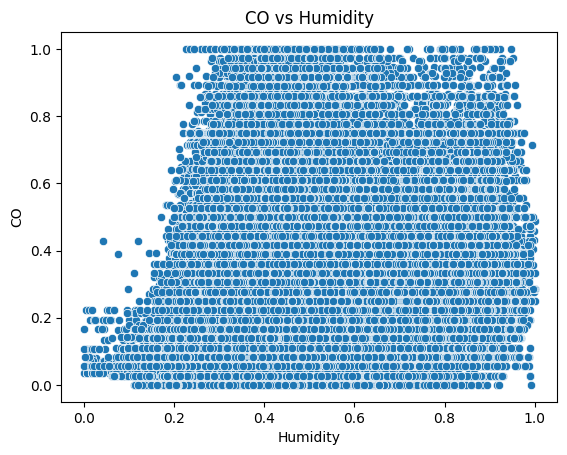

In [120]:
sns.scatterplot(x='DEWP', y='CO', data=merged_df)
plt.title("CO vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("CO")
plt.show()

 #### O3 vs various conditions:

##### O3 vs Temperature

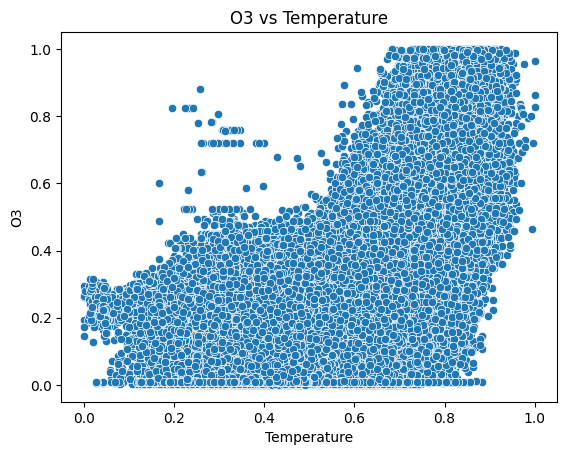

In [121]:
sns.scatterplot(x='TEMP', y='O3', data=merged_df)
plt.title("O3 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("O3")
plt.show()

##### O3 vs Wind Speed:

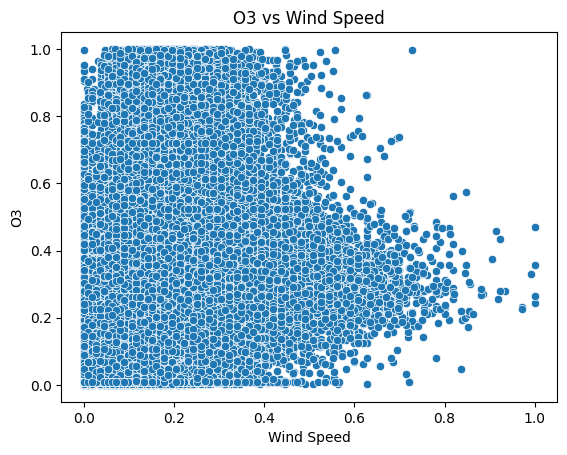

In [122]:
sns.scatterplot(x='WSPM', y='O3', data=merged_df)
plt.title("O3 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("O3")
plt.show()

##### O3 vs Rainfall

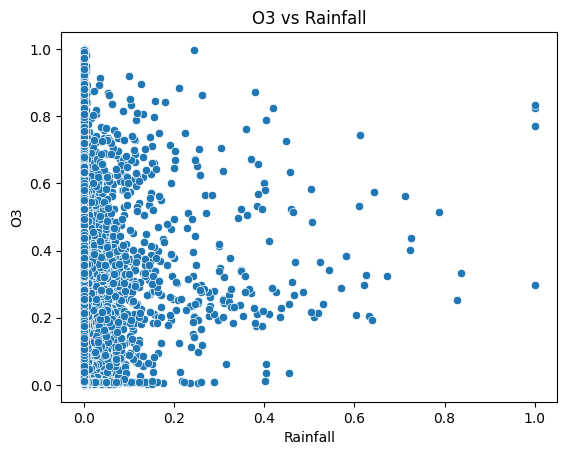

In [123]:
sns.scatterplot(x='RAIN', y='O3', data=merged_df)
plt.title("O3 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("O3")
plt.show()

##### O3 vs Humidity/Dew Point

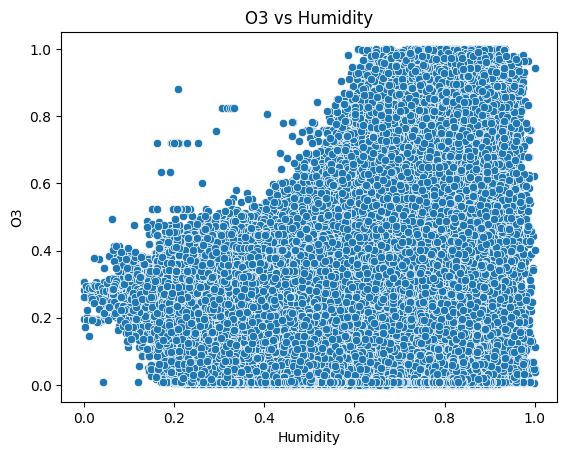

In [124]:
sns.scatterplot(x='DEWP', y='O3', data=merged_df)
plt.title("O3 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("O3")
plt.show()

## Multivariable Analysis:

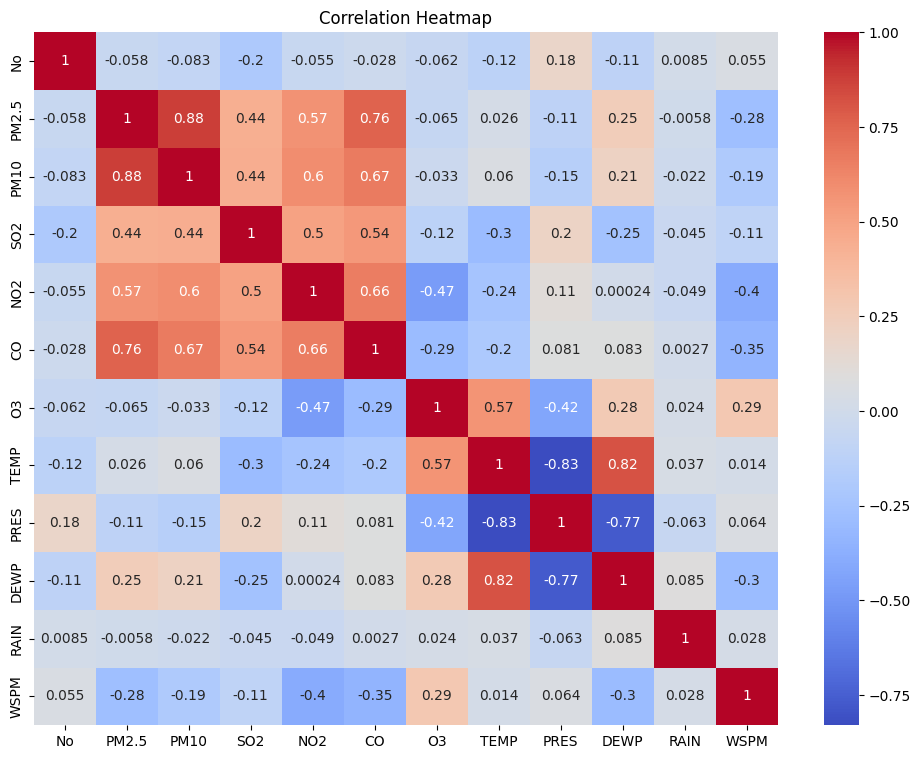

In [125]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Time series Analysis:

###PM2.5 Over the years:

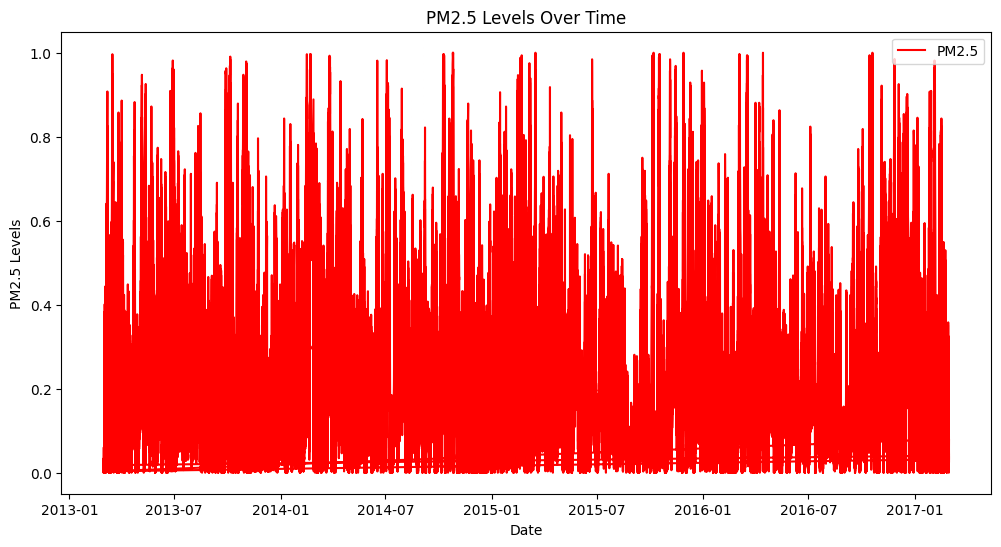

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM2.5'], label='PM2.5', color='red')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 Levels Over Time')
plt.legend()
plt.show()

###PM10 Over the years:

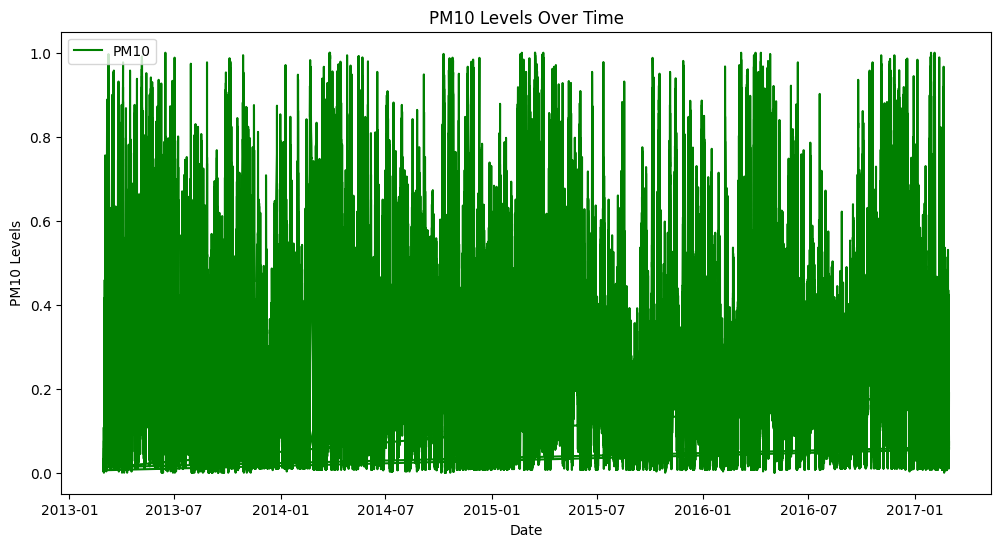

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM10'], label='PM10', color='green')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.title('PM10 Levels Over Time')
plt.legend()
plt.show()

###SO2 Over the years:

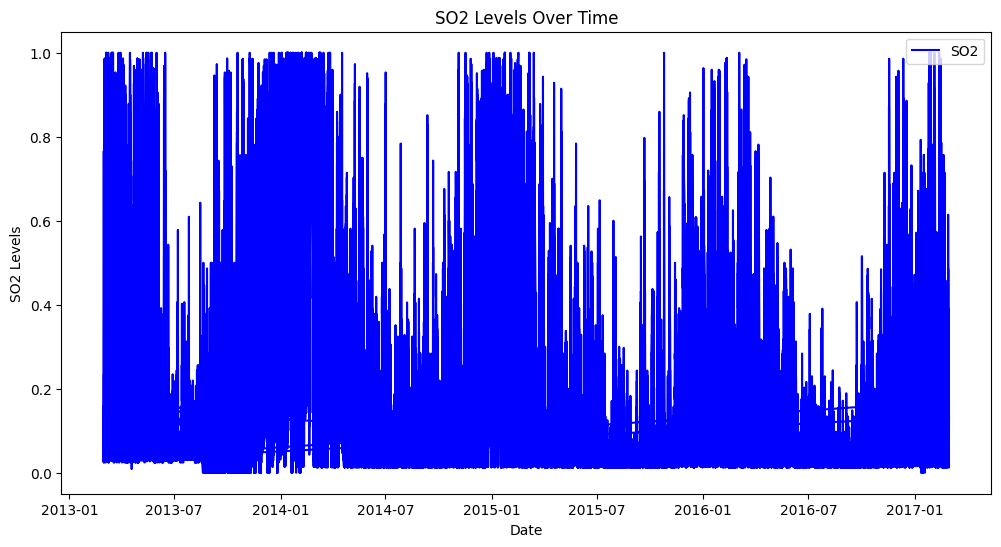

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO2'], label='SO2', color='blue')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.title('SO2 Levels Over Time')
plt.legend()
plt.show()

###SO2 Over the years:

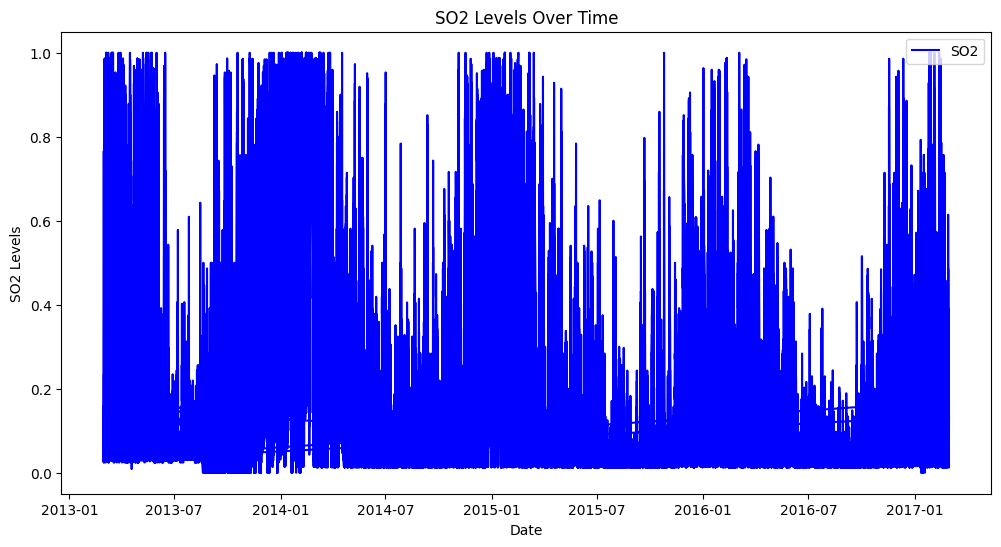

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO2'], label='SO2', color='blue')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.title('SO2 Levels Over Time')
plt.legend()
plt.show()

###NO2 Over the years:

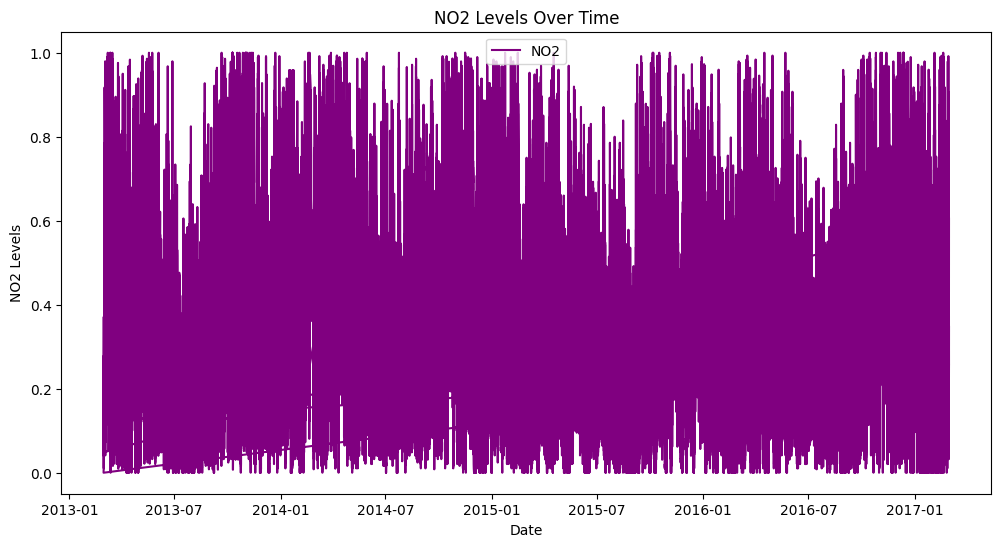

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['NO2'], label='NO2', color='purple')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.title('NO2 Levels Over Time')
plt.legend()
plt.show()

###CO Over the years:

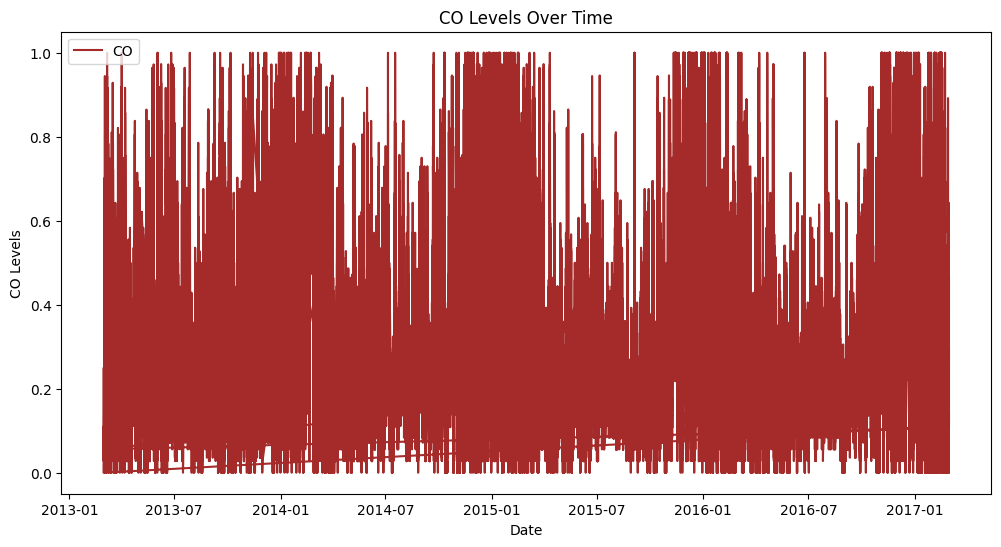

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['CO'], label='CO', color='brown')
plt.xlabel('Date')
plt.ylabel('CO Levels')
plt.title('CO Levels Over Time')
plt.legend()
plt.show()

###O3 Over the years:

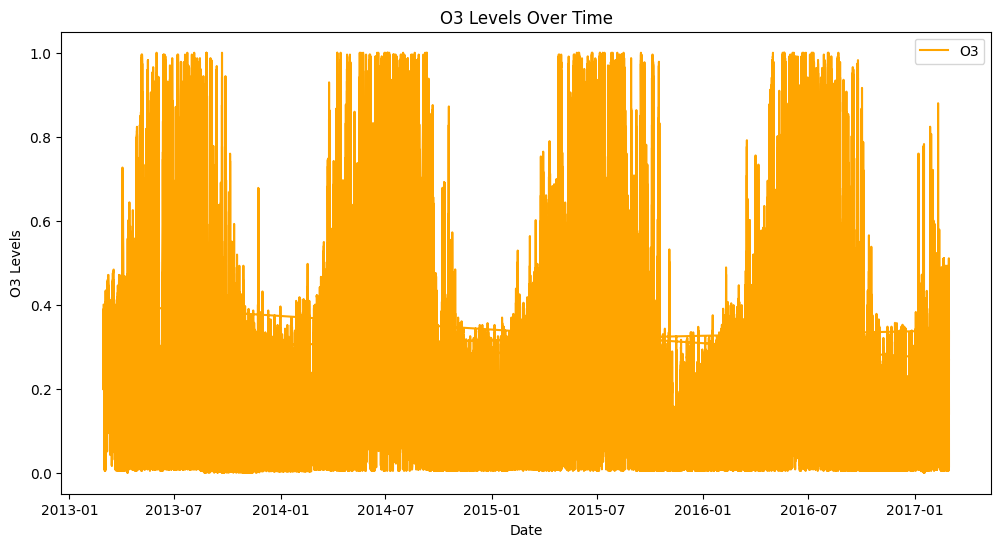

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['O3'], label='O3', color='orange')
plt.xlabel('Date')
plt.ylabel('O3 Levels')
plt.title('O3 Levels Over Time')
plt.legend()
plt.show()

## Feature Engineering:

### Polution Ratio:

These ratios help you understand the composition of the pollution.

#### PM Ratio:

A high PM2.5/PM10 ratio = finer particles dominate, which are more harmful.

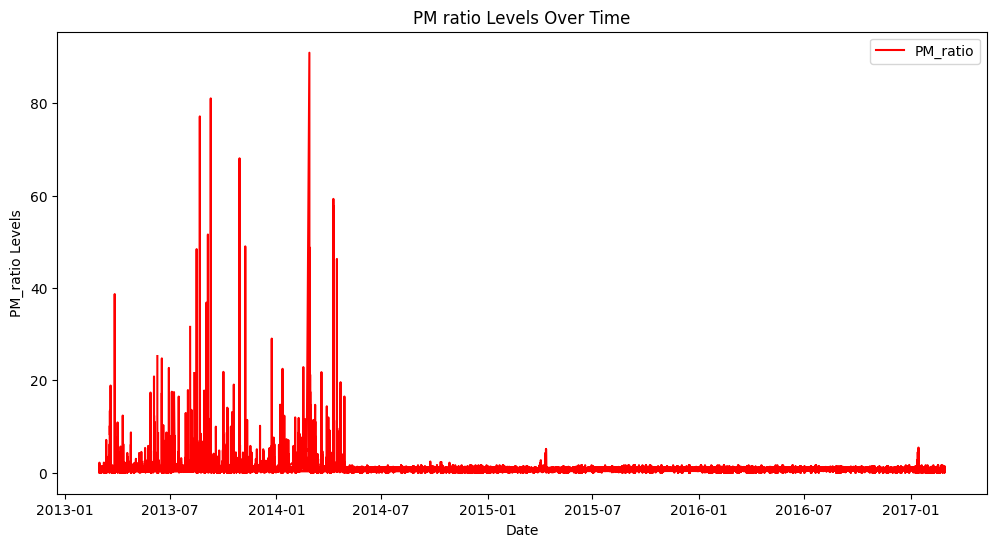

In [133]:
merged_df['PM_ratio'] = merged_df['PM2.5'] / merged_df['PM10']

plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM_ratio'], label='PM_ratio', color='red')
plt.xlabel('Date')
plt.ylabel('PM_ratio Levels')
plt.title('PM ratio Levels Over Time')
plt.legend()
plt.show()

#### SO Ratio:

NO2/SO2 might indicate vehicle vs industry pollution sources.

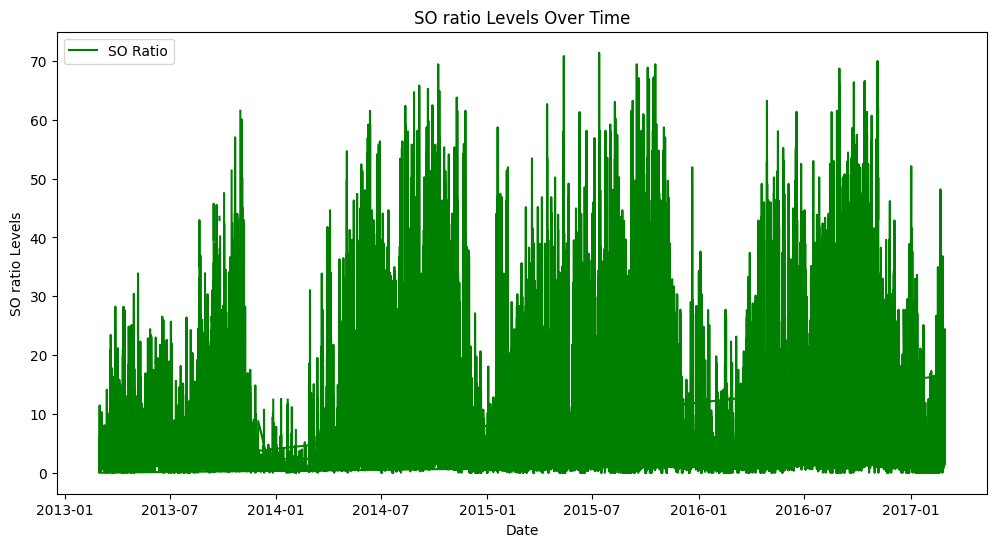

In [134]:
merged_df['SO_ratio'] = merged_df['NO2'] / merged_df['SO2']


plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO_ratio'], label='SO Ratio', color='green')
plt.xlabel('Date')
plt.ylabel('SO ratio Levels')
plt.title('SO ratio Levels Over Time')
plt.legend()
plt.show()

### Rolling Averages:

It highlights the underlying trends and helps for forecasting models.

In [135]:
merged_df['pm25_3hr_avg'] = merged_df['PM2.5'].rolling(window=3).mean()

### Categories for Air Quality Index(AQI)

#### PM2.5 AQI

In [136]:
merged_df['PM25_AQI_level'] = pd.cut(merged_df['PM2.5'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['PM25_AQI_level']

0         Good
1         Good
2         Good
3         Good
4          NaN
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: PM25_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### PM10 AQI

In [137]:
merged_df['PM10_AQI_level'] = pd.cut(merged_df['PM10'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['PM10_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: PM10_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### SO2 AQI

In [138]:
merged_df['SO2_AQI_level'] = pd.cut(merged_df['SO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['SO2_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: SO2_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### NO2 AQI

In [139]:
merged_df['NO2_AQI_level'] = pd.cut(merged_df['NO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['NO2_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: NO2_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### CO AQI

In [140]:
# Example: Simplified
merged_df['CO_AQI_level'] = pd.cut(merged_df['CO'], bins=[0, 50, 100, 150, 200, 300, 600], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['CO_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: CO_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### O3 AQI

In [141]:
merged_df['O3_AQI_level'] = pd.cut(merged_df['NO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['O3_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
113562    Good
113563    Good
113564    Good
113565    Good
113566    Good
Name: O3_AQI_level, Length: 113567, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### Dealing with missing values:

In [142]:
merged_df.isnull().sum()

datetime             0
No                   0
PM2.5                0
PM10                 0
SO2                  0
NO2                  0
CO                   0
O3                   0
TEMP                 0
PRES                 0
DEWP                 0
RAIN                 0
wd                   0
WSPM                 0
station              0
PM_ratio             0
SO_ratio            24
pm25_3hr_avg         2
PM25_AQI_level    1184
PM10_AQI_level      70
SO2_AQI_level     1521
NO2_AQI_level     1066
CO_AQI_level      1845
O3_AQI_level      1066
dtype: int64

In [143]:
merged_df.dropna(inplace=True)
merged_df.isnull().sum() # To check if there are any missing values left

datetime          0
No                0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd                0
WSPM              0
station           0
PM_ratio          0
SO_ratio          0
pm25_3hr_avg      0
PM25_AQI_level    0
PM10_AQI_level    0
SO2_AQI_level     0
NO2_AQI_level     0
CO_AQI_level      0
O3_AQI_level      0
dtype: int64

### Turning string into numerical data:

Only numerical data can be used to train ML models.

In [144]:
merged_df = pd.get_dummies(merged_df, columns=['wd'])
merged_df

datetime     No     PM2.5      PM10       SO2       NO2  \
2      2013-03-01 05:00:00      6  0.002976  0.005556  0.108108  0.164286   
3      2013-03-01 06:00:00      7  0.005952  0.008333  0.121622  0.192857   
8      2013-03-01 11:00:00     12  0.008929  0.011111  0.081081  0.121429   
13     2013-03-01 16:00:00     17  0.017857  0.041667  0.067568  0.121429   
14     2013-03-01 17:00:00     18  0.017857  0.055556  0.108108  0.135714   
...                    ...    ...       ...       ...       ...       ...   
113562 2017-02-28 19:00:00  35060  0.030864  0.102639  0.024390  0.231293   
113563 2017-02-28 20:00:00  35061  0.052469  0.120235  0.036585  0.312925   
113564 2017-02-28 21:00:00  35062  0.040123  0.090909  0.048780  0.251701   
113565 2017-02-28 22:00:00  35063  0.024691  0.064516  0.048780  0.306122   
113566 2017-02-28 23:00:00  35064  0.037037  0.073314  0.048780  0.346939   

              CO        O3      TEMP      PRES  ...  wd_NNW  wd_NW   wd_S  \
2       0.054054  0.330472  0.251748  0.733945  ...   False   True  False   
3       0.081081  0.283262  0.250000  0.746789  ...   False   True  False   
8       0.081081  0.351931  0.344406  0.776147  ...    True  False  False   
13      0.054054  0.386266  0.391608  0.737615  ...   False  False  False   
14      0.081081  0.369099  0.370629  0.746789  ...   False  False  False   
...          ...       ...       ...       ...  ...     ...    ...    ...   
113562  0.083333  0.256828  0.511344  0.491979  ...   False   True  False   
113563  0.111111  0.183799  0.495637  0.493761  ...   False  False  False   
113564  0.111111  0.213870  0.481675  0.504456  ...   False   True  False   
113565  0.111111  0.175207  0.476440  0.508021  ...    True  False  False   
113566  0.138889  0.140841  0.443281  0.502674  ...   False  False  False   

        wd_SE  wd_SSE  wd_SSW  wd_SW   wd_W wd_WNW wd_WSW  
2       False   False   False  False  False  False  False  
3       False   False   False  False  False  False  False  
8       False   False   False  False  False  False  False  
13      False   False   False  False  False  False  False  
14      False   False   False  False  False  False  False  
...       ...     ...     ...    ...    ...    ...    ...  
113562  False   False   False  False  False  False  False  
113563  False   False   False  False  False   True  False  
113564  False   False   False  False  False  False  False  
113565  False   False   False  False  False  False  False  
113566  False   False   False  False  False  False  False  

[108165 rows x 39 columns]

### Station Data:

Pollution varies by location type, so it is important to add meta data.

In [145]:
merged_df['station_type'] = merged_df['station'].map({
    'Dongsi': 'Urban',
    'Shunyi': 'Suburban',
    'Huairou': 'Rural',
    'Guanyuan': 'Industrial',
})
merged_df


datetime     No     PM2.5      PM10       SO2       NO2  \
2      2013-03-01 05:00:00      6  0.002976  0.005556  0.108108  0.164286   
3      2013-03-01 06:00:00      7  0.005952  0.008333  0.121622  0.192857   
8      2013-03-01 11:00:00     12  0.008929  0.011111  0.081081  0.121429   
13     2013-03-01 16:00:00     17  0.017857  0.041667  0.067568  0.121429   
14     2013-03-01 17:00:00     18  0.017857  0.055556  0.108108  0.135714   
...                    ...    ...       ...       ...       ...       ...   
113562 2017-02-28 19:00:00  35060  0.030864  0.102639  0.024390  0.231293   
113563 2017-02-28 20:00:00  35061  0.052469  0.120235  0.036585  0.312925   
113564 2017-02-28 21:00:00  35062  0.040123  0.090909  0.048780  0.251701   
113565 2017-02-28 22:00:00  35063  0.024691  0.064516  0.048780  0.306122   
113566 2017-02-28 23:00:00  35064  0.037037  0.073314  0.048780  0.346939   

              CO        O3      TEMP      PRES  ...  wd_NW   wd_S  wd_SE  \
2       0.054054  0.330472  0.251748  0.733945  ...   True  False  False   
3       0.081081  0.283262  0.250000  0.746789  ...   True  False  False   
8       0.081081  0.351931  0.344406  0.776147  ...  False  False  False   
13      0.054054  0.386266  0.391608  0.737615  ...  False  False  False   
14      0.081081  0.369099  0.370629  0.746789  ...  False  False  False   
...          ...       ...       ...       ...  ...    ...    ...    ...   
113562  0.083333  0.256828  0.511344  0.491979  ...   True  False  False   
113563  0.111111  0.183799  0.495637  0.493761  ...  False  False  False   
113564  0.111111  0.213870  0.481675  0.504456  ...   True  False  False   
113565  0.111111  0.175207  0.476440  0.508021  ...  False  False  False   
113566  0.138889  0.140841  0.443281  0.502674  ...  False  False  False   

       wd_SSE  wd_SSW  wd_SW   wd_W wd_WNW wd_WSW station_type  
2       False   False  False  False  False  False        Urban  
3       False   False  False  False  False  False        Urban  
8       False   False  False  False  False  False        Urban  
13      False   False  False  False  False  False        Urban  
14      False   False  False  False  False  False        Urban  
...       ...     ...    ...    ...    ...    ...          ...  
113562  False   False  False  False  False  False   Industrial  
113563  False   False  False  False   True  False   Industrial  
113564  False   False  False  False  False  False   Industrial  
113565  False   False  False  False  False  False   Industrial  
113566  False   False  False  False  False  False   Industrial  

[108165 rows x 40 columns]

### Grouping:

#### Average PM2.5 by Station:

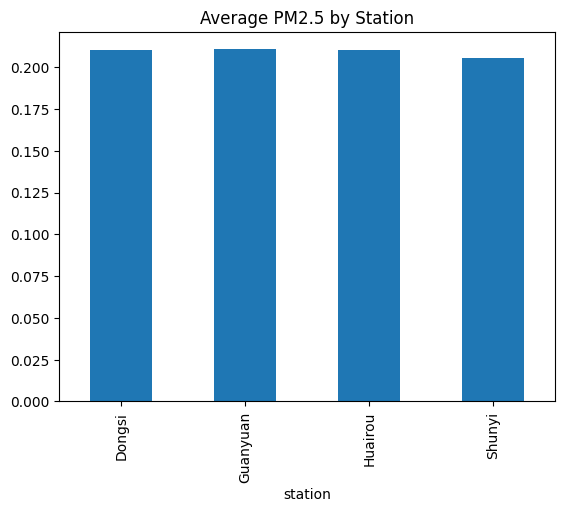

In [146]:
merged_df.groupby('station')['PM2.5'].mean().plot(kind='bar')
plt.title("Average PM2.5 by Station")
plt.show()

#### Average PM10 by Station:

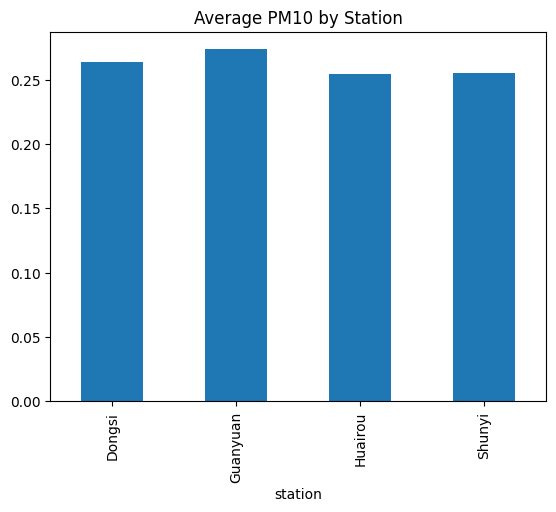

In [147]:
merged_df.groupby('station')['PM10'].mean().plot(kind='bar')
plt.title("Average PM10 by Station")
plt.show()

#### Average SO2 by Station:

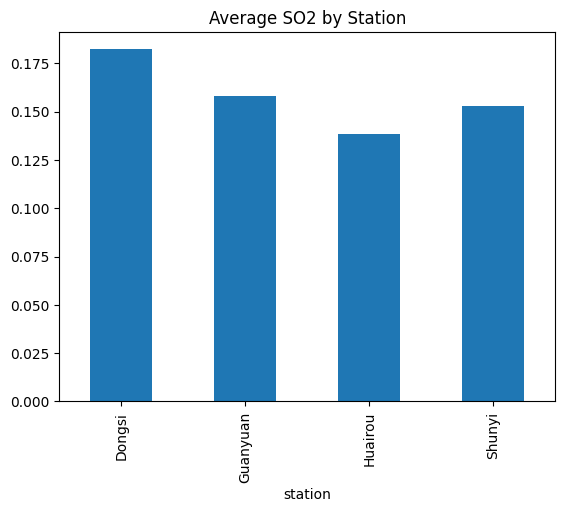

In [148]:
merged_df.groupby('station')['SO2'].mean().plot(kind='bar')
plt.title("Average SO2 by Station")
plt.show()

#### Average NO2 by Station:

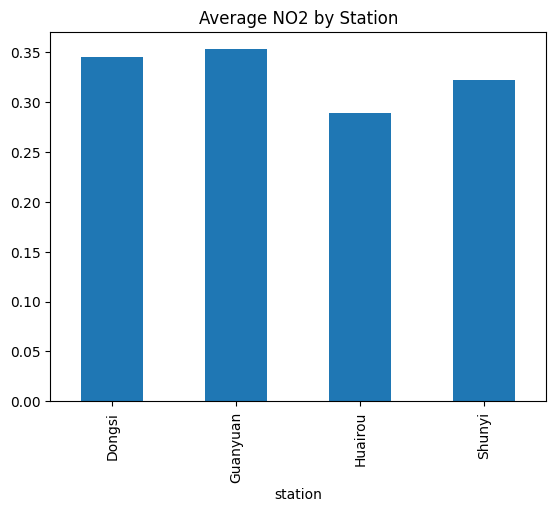

In [149]:
merged_df.groupby('station')['NO2'].mean().plot(kind='bar')
plt.title("Average NO2 by Station")
plt.show()

#### Average CO by Station:

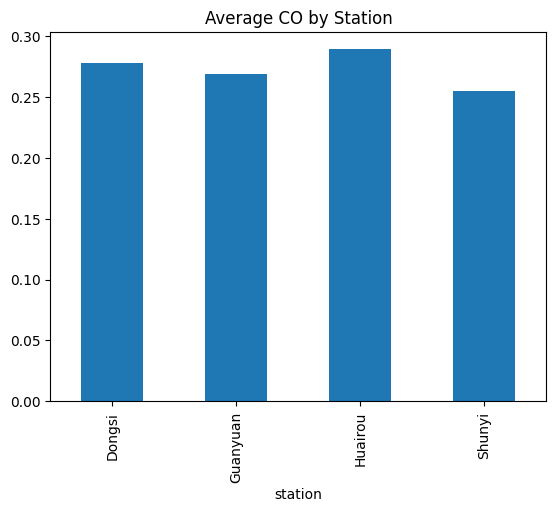

In [150]:
merged_df.groupby('station')['CO'].mean().plot(kind='bar')
plt.title("Average CO by Station")
plt.show()

#### Average O3 by Station:

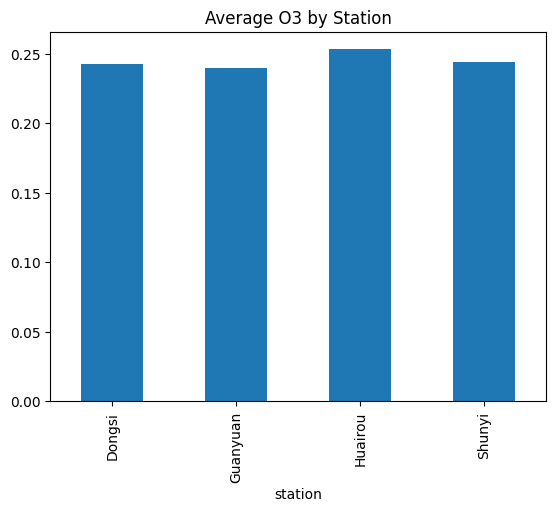

In [151]:
merged_df.groupby('station')['O3'].mean().plot(kind='bar')
plt.title("Average O3 by Station")
plt.show()

### Cleaned and Transformed Dataset:

In [152]:
merged_df.to_csv('Transformed_dataset.csv', index=False)

In [153]:
merged_df

datetime     No     PM2.5      PM10       SO2       NO2  \
2      2013-03-01 05:00:00      6  0.002976  0.005556  0.108108  0.164286   
3      2013-03-01 06:00:00      7  0.005952  0.008333  0.121622  0.192857   
8      2013-03-01 11:00:00     12  0.008929  0.011111  0.081081  0.121429   
13     2013-03-01 16:00:00     17  0.017857  0.041667  0.067568  0.121429   
14     2013-03-01 17:00:00     18  0.017857  0.055556  0.108108  0.135714   
...                    ...    ...       ...       ...       ...       ...   
113562 2017-02-28 19:00:00  35060  0.030864  0.102639  0.024390  0.231293   
113563 2017-02-28 20:00:00  35061  0.052469  0.120235  0.036585  0.312925   
113564 2017-02-28 21:00:00  35062  0.040123  0.090909  0.048780  0.251701   
113565 2017-02-28 22:00:00  35063  0.024691  0.064516  0.048780  0.306122   
113566 2017-02-28 23:00:00  35064  0.037037  0.073314  0.048780  0.346939   

              CO        O3      TEMP      PRES  ...  wd_NW   wd_S  wd_SE  \
2       0.054054  0.330472  0.251748  0.733945  ...   True  False  False   
3       0.081081  0.283262  0.250000  0.746789  ...   True  False  False   
8       0.081081  0.351931  0.344406  0.776147  ...  False  False  False   
13      0.054054  0.386266  0.391608  0.737615  ...  False  False  False   
14      0.081081  0.369099  0.370629  0.746789  ...  False  False  False   
...          ...       ...       ...       ...  ...    ...    ...    ...   
113562  0.083333  0.256828  0.511344  0.491979  ...   True  False  False   
113563  0.111111  0.183799  0.495637  0.493761  ...  False  False  False   
113564  0.111111  0.213870  0.481675  0.504456  ...   True  False  False   
113565  0.111111  0.175207  0.476440  0.508021  ...  False  False  False   
113566  0.138889  0.140841  0.443281  0.502674  ...  False  False  False   

       wd_SSE  wd_SSW  wd_SW   wd_W wd_WNW wd_WSW station_type  
2       False   False  False  False  False  False        Urban  
3       False   False  False  False  False  False        Urban  
8       False   False  False  False  False  False        Urban  
13      False   False  False  False  False  False        Urban  
14      False   False  False  False  False  False        Urban  
...       ...     ...    ...    ...    ...    ...          ...  
113562  False   False  False  False  False  False   Industrial  
113563  False   False  False  False   True  False   Industrial  
113564  False   False  False  False  False  False   Industrial  
113565  False   False  False  False  False  False   Industrial  
113566  False   False  False  False  False  False   Industrial  

[108165 rows x 40 columns]